 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

In [3]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import plotly.graph_objects as go



rng= np.random.default_rng(seed=12345)

22.712195536029963
(50, 2) (2,)


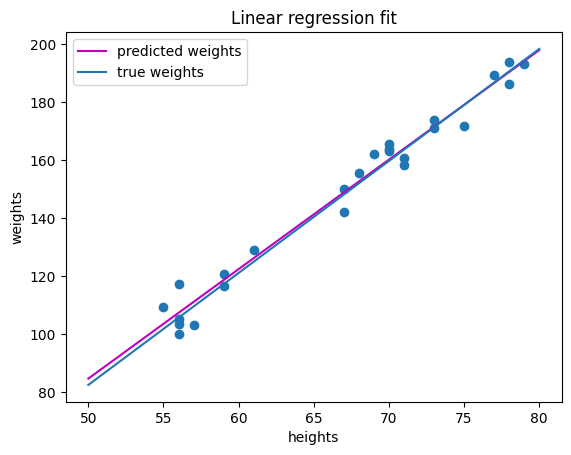

(60, 50) (60, 50)


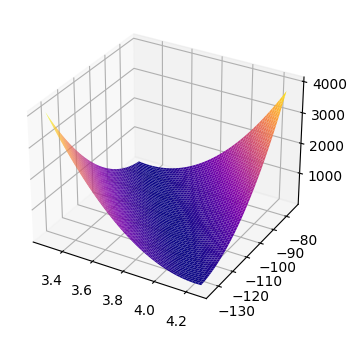

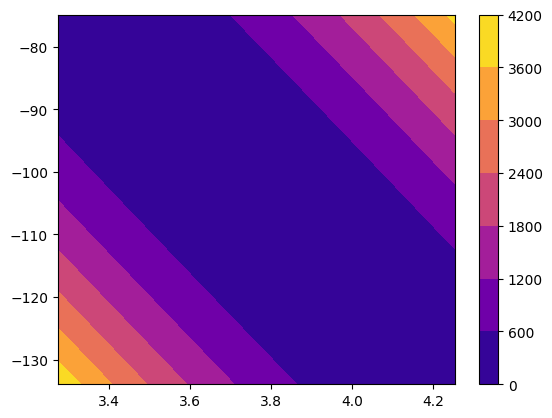

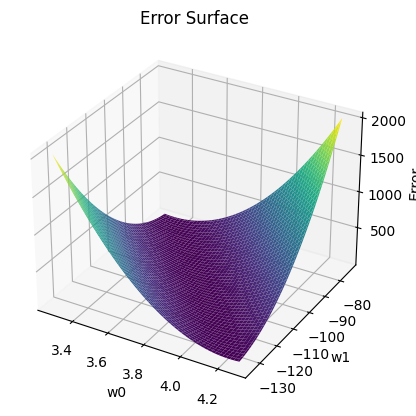

Minimum of the error surface: w0 = 3.768447749570547, w1 = -103.6099088861879
Using pseudo-inverse formula: w0 = 3.7734982546210523, w1 = -103.9129391892182


In [3]:


def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    w_opt = np.linalg.pinv(x) @ t
    return w_opt

def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
    #Estimate the target
    y = x @ w
    error = np.mean((y - t) ** 2)
    #Compute and return the error
    return error

########################################
#Generate meaningfull data
########################################
heights = rng.choice(np.arange(50,80), size=25, replace=True)
noise = rng.standard_normal(25) * (20**0.5)
targets = 3.86 * heights - 110.42 + noise
w_true = [3.86, -110.42]

########################################
#Plot scatter plot of data
########################################

plt.scatter(heights, targets)


########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
#Sample a bunch of w's around w_opt and compute the associated error

X = np.vstack((heights, np.ones(25))).T
w_pseudo_inverse = LinearRegression(X, targets)

predictions = X @ w_pseudo_inverse
error = Error(w_pseudo_inverse, targets,X)
print(error)
w0 = w_pseudo_inverse[0]
w1 = w_pseudo_inverse[1]

x = np.linspace(50, 80, 50)
x_augmented = np.vstack((x, np.ones(50))).T
print(x_augmented.shape, w_pseudo_inverse.shape)
y = x_augmented @ w_pseudo_inverse
y_true = x_augmented @ w_true
plt.plot(x_augmented[:, 0],y, c='m', label="predicted weights")
plt.plot(x_augmented[:, 0],y_true, label="true weights")
plt.xlabel("heights")
plt.ylabel("weights")
plt.title("Linear regression fit")
plt.legend()
plt.show()

#Compute the error
# def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
#     #Estimate the target
#     y = x @ w
#     error = np.mean((y - t) ** 2)
#     #Compute and return the error
#     return error


#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1
# print(type(w0))

w0_min, w0_max = w0 - 0.5, w0 + 0.5
w1_min, w1_max = w1 - 30, w1 + 30

w0s = np.arange(w0_min, w0_max, 0.02)
w1s = np.arange(w1_min, w1_max, 1)
W0, W1 = np.meshgrid(w0s, w1s)
print(W0.shape, W1.shape)
grid_points = np.vstack((W0.ravel(), W1.ravel())).T

errors = np.array([Error(grid_point, targets, X) for grid_point in grid_points])
errors = errors.reshape(W0.shape)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(W0, W1, errors, rstride=1, cstride=1, cmap=plt.cm.plasma, linewidth=0.1)
plt.show()


plt.contourf(W0, W1, errors, cmap=plt.cm.plasma)
plt.colorbar()
plt.show()


def plot_3d_mesh(X, Y, Z):
  """
  Generates a movable 3D plot using Plotly.

  Args:
    X: NumPy meshgrid for the x-coordinates.
    Y: NumPy meshgrid for the y-coordinates.
    Z: NumPy array containing the output values for each (x, y) pair.

  Returns:
    A Plotly figure object.
  """

  fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])
  fig.update_layout(title='Movable 3D Plot', autosize=False,
                    width=500, height=500,
                    margin=dict(l=65, r=50, b=65, t=90))
  fig.show()

plot_3d_mesh(W0, W1, errors)

#Locate the minima of the error surface

# Create a grid of w0 and w1 values

# Define the error surface
def error_surface(w0, w1):
    w = np.array([w0, w1])
    return np.sum((X @ w - targets) ** 2) / len(x)

# Create a grid of w0 and w1 values
w0_values = np.linspace(w_pseudo_inverse[0] - 0.5, w_pseudo_inverse[0] + 0.5, 100)
w1_values = np.linspace(w_pseudo_inverse[1] - 30, w_pseudo_inverse[1] + 30, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)
E = np.zeros_like(W0)

# Calculate the error surface
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        E[i, j] = error_surface(W0[i, j], W1[i, j])

# Locate the minimum of the error surface
min_index = np.unravel_index(np.argmin(E), E.shape)
w0_min, w1_min = W0[min_index], W1[min_index]

# Plot the error surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, E, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Error')
ax.set_title('Error Surface')
plt.show()

# Print the results
print(f"Minimum of the error surface: w0 = {w0_min}, w1 = {w1_min}")
print(f"Using pseudo-inverse formula: w0 = {w_pseudo_inverse[0]}, w1 = {w_pseudo_inverse[1]}")
########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
# def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
#     w_opt = np.linalg.pinv(x) @ t
#     return w_opt


#Estimate optimal weight's using "LinearRegression" function



#Estimate the targets using the input x and the estimated weights



#Plot the estimated line on top of the above scatter plot



########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################





Observation 1: The error surface plot shows a clear minimum point, which corresponds to the optimal weights $w_0$ and $w_1$ that minimize the least squares error.

Observation 2: The least squares approach provides a direct method to estimate the optimal weights, which closely match the true weights used to generate the noisy data.

Observation 3: The error surface is convex, indicating that the least squares criterion has a unique global minimum, making it a reliable method for parameter estimation.

[ -0.80046968  18.24953716 -53.80609341  37.85022912]


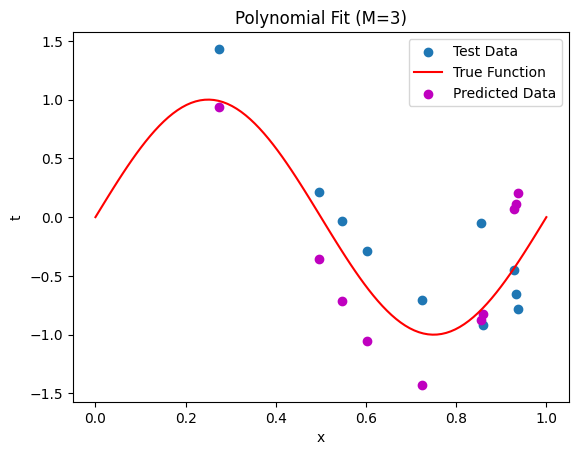

0.25442016796925004 0.6832688691453115


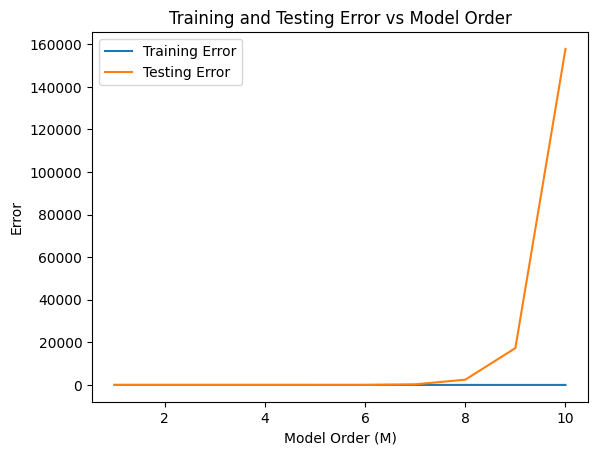

[0.4636262225818377, 0.42430547704710975, 0.25442016796925004, 0.2527738099101638, 0.2060364180239294, 0.18774097931269038, 0.14746264746426085, 0.13483227652643698, 0.15186400940835046, 0.3014027772708287] [0.7297297759028013, 1.1022626582625743, 0.6832688691453115, 0.9133624599745794, 7.248031971681459, 16.367201044497513, 274.2659545783458, 2460.081432595582, 17306.38401701967, 157812.78914364774]


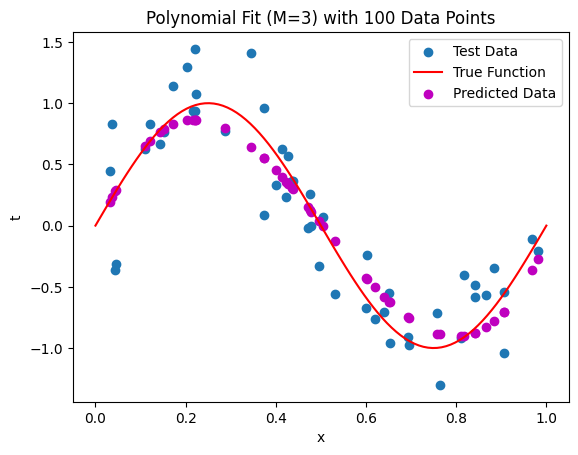

For a 3 dimensional feature vector: train error = 0.2688018853861496, test error = 0.31394054884194283


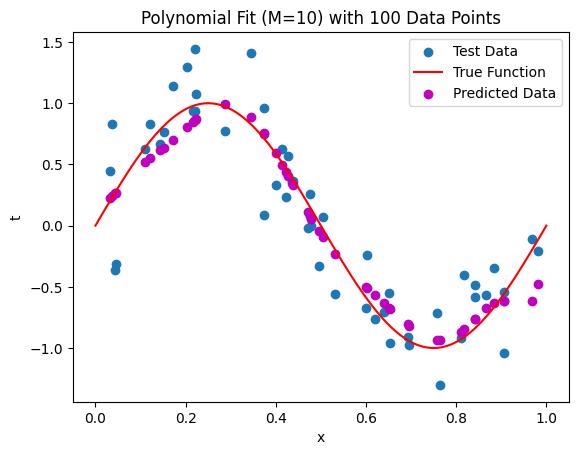

For a 10 dimensional feature vector: train error = 0.22995671062781828, test error = 0.3051543371009408


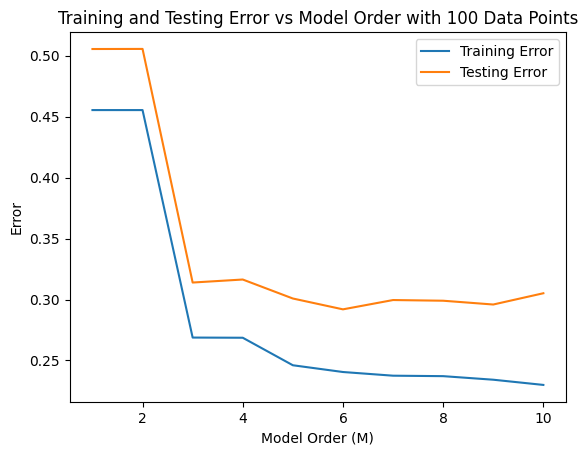

[0.4554044236068264, 0.4553979378168961, 0.2688018853861496, 0.26865600292556163, 0.24608860547806397, 0.24054889343434532, 0.23752974274036415, 0.23714847165791997, 0.23422602707167225, 0.22995671062781828] [0.5054847313064561, 0.5055654185487676, 0.31394054884194283, 0.3164136756553166, 0.30084085986709364, 0.2919484912962765, 0.29958347980321576, 0.29902172974678914, 0.29591114081964226, 0.3051543371009408]


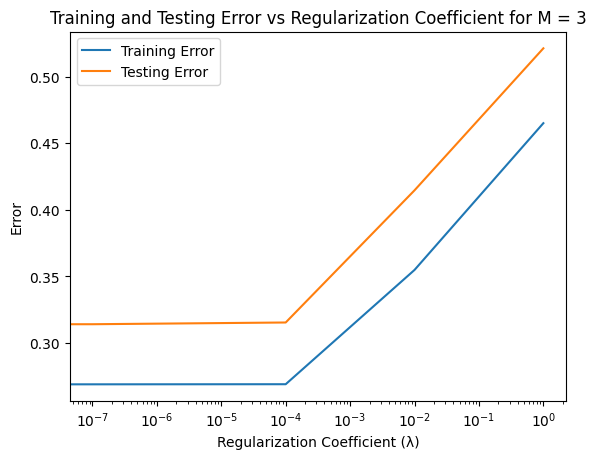

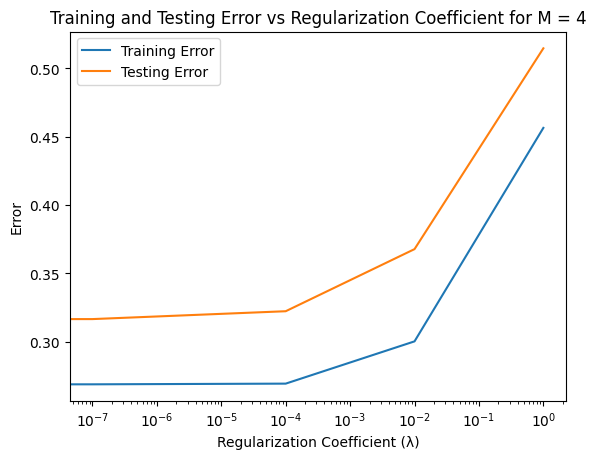

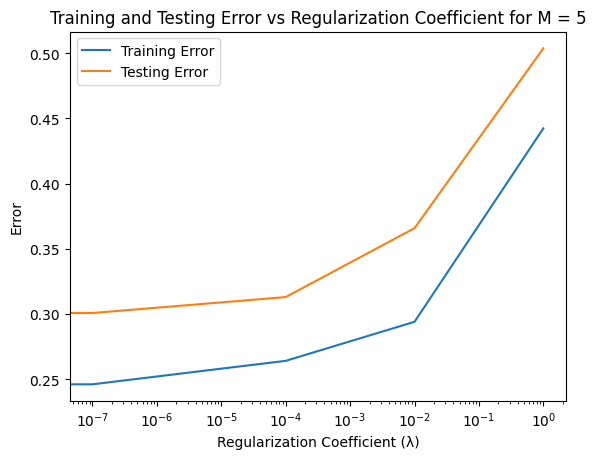

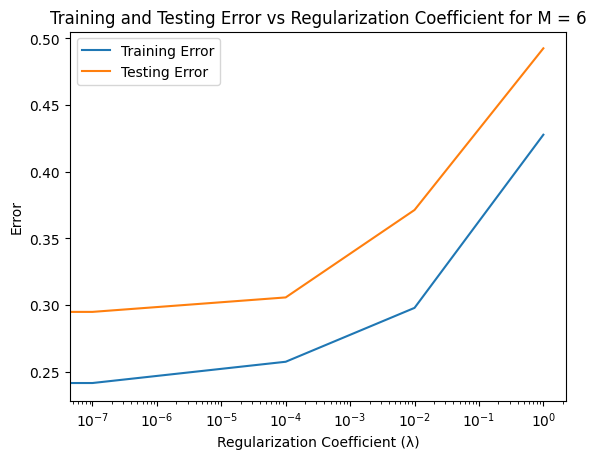

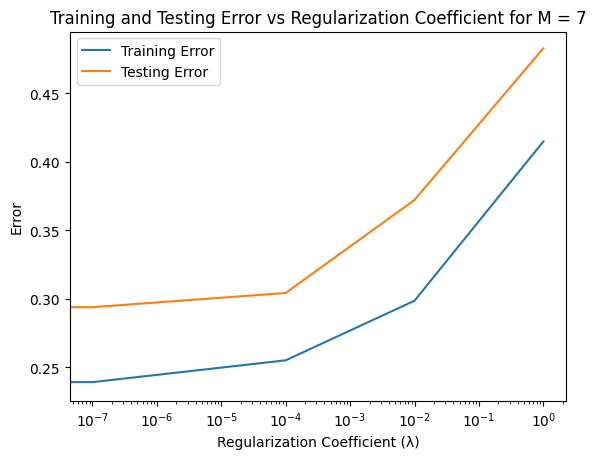

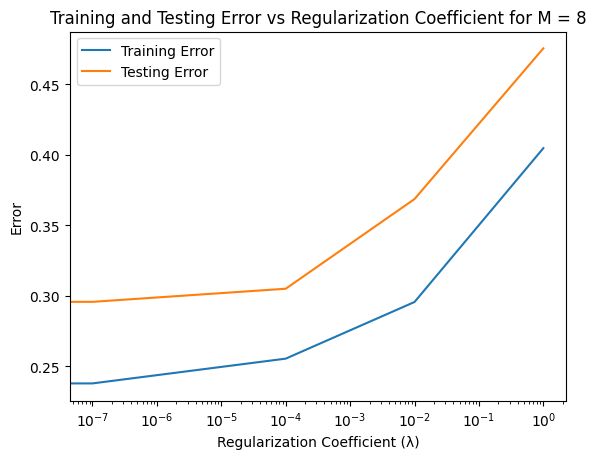

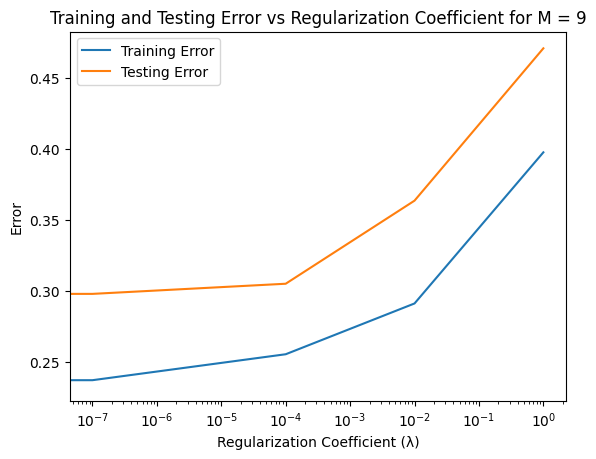

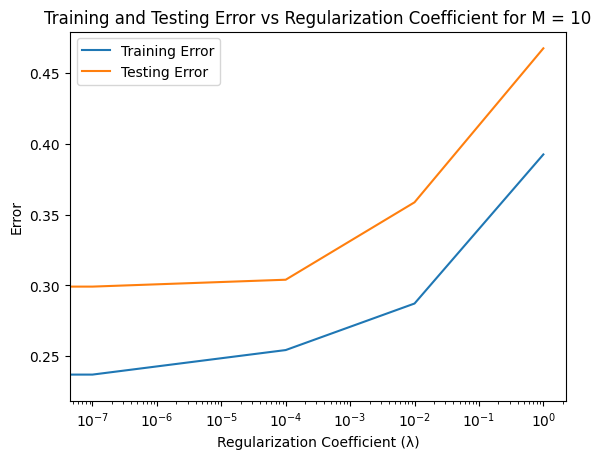

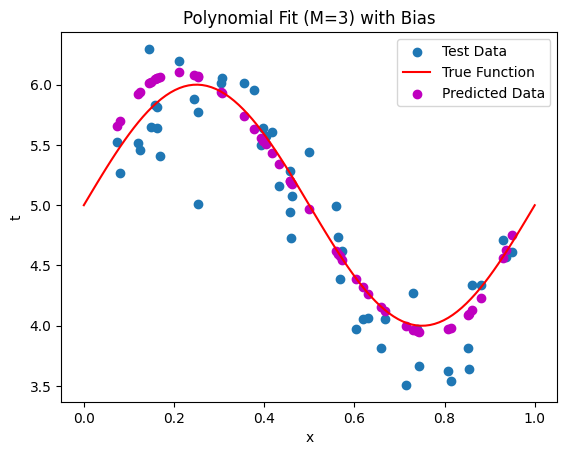

For a 3 dimensional feature vector with bias: train error = 0.3368686228566913, test error = 0.32554650084339604


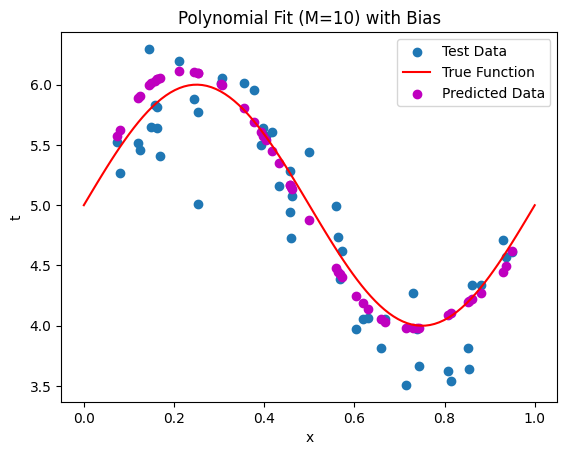

For a 10 dimensional feature vector with bias: train error = 0.3245445427354788, test error = 0.33206510914681064


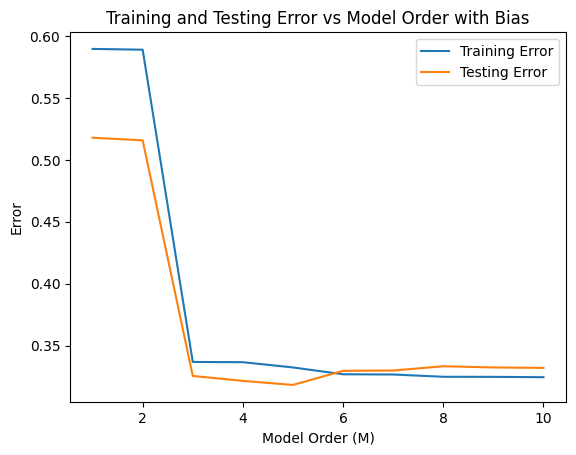

[0.5895356349927166, 0.5889048242524508, 0.3368686228566913, 0.33665646431462315, 0.3324152852135322, 0.3269158993759505, 0.3267244780999096, 0.3248908462924817, 0.32482150325929027, 0.3245445427354788] [0.5178498417696584, 0.5157410084550373, 0.32554650084339604, 0.32156214897095753, 0.31831362299868454, 0.32968820419270956, 0.3299511382977295, 0.3333786065137073, 0.3324264786394487, 0.33206510914681064]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=12345)

def create_data(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = rng.uniform(0, 1, size)
    ts = np.sin(2*np.pi*xs) + e

    # Obtain train and test splits
    half = int(size*0.5)
    x_train = xs[:half]
    x_test = xs[half:]
    y_train = ts[:half]
    y_test = ts[half:]

    return x_train, x_test, y_train, y_test

def featurize(x_scalar, M):
    x_vector = np.zeros(M+1)
    for j in range(M+1):
        x_vector[j] = x_scalar ** j
    return x_vector

def PolynomialFit(X_train, Y_train, M, lamda, n_points, split_frac):
    n_train = int(n_points * split_frac)
    phi = np.zeros((n_train, M+1))
    for i in range(n_train):
        phi[i] = featurize(X_train[i], M)
    identity = np.identity(M+1)
    w_opt = np.linalg.inv(phi.T @ phi + lamda * identity) @ (phi.T @ Y_train)
    return w_opt

def PolynomialPred(w_est, X_train, X_test, M):
    x_train = np.array([featurize(X_train[i], M) for i in range(len(X_train))])
    x_test = np.array([featurize(X_test[i], M) for i in range(len(X_test))])
    TrainPred = x_train @ w_est
    TestPred = x_test @ w_est
    return TrainPred, TestPred

def PolynomialPred_Error(train_pred, Y_train, test_pred, Y_test):
    TrainError = np.linalg.norm(train_pred - Y_train) / (len(train_pred) ** 0.5)
    TestError = np.linalg.norm(test_pred - Y_test) / (len(test_pred) ** 0.5)
    return TrainError, TestError

x_train, x_test, y_train, y_test = create_data(20)
w = PolynomialFit(x_train, y_train, 3, 0, 20, 0.5)
print(w)

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
train_pred, test_pred = PolynomialPred(w, x_train, x_test, 3)
plt.scatter(x_test, test_pred, c='m', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial Fit (M=3)')
plt.legend()
plt.show()

train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
print(train_error, test_error)

M_range = list(range(1, 11, 1))
TrError = []
TeError = []
for M in M_range:
    w_opt = PolynomialFit(x_train, y_train, M, 0, 20, 0.5)
    train_pred, test_pred = PolynomialPred(w_opt, x_train, x_test, M)
    train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
    TrError.append(train_error)
    TeError.append(test_error)

plt.plot(M_range, TrError, label='Training Error')
plt.plot(M_range, TeError, label='Testing Error')
plt.xlabel('Model Order (M)')
plt.ylabel('Error')
plt.title('Training and Testing Error vs Model Order')
plt.legend()
plt.show()

print(TrError, TeError)

x_train, x_test, y_train, y_test = create_data(100)

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
w = PolynomialFit(x_train, y_train, 3, 0, 100, 0.5)
train_pred, test_pred = PolynomialPred(w, x_train, x_test, 3)
plt.scatter(x_test, test_pred, c='m', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial Fit (M=3) with 100 Data Points')
plt.legend()
plt.show()

train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
print(f"For a 3 dimensional feature vector: train error = {train_error}, test error = {test_error}")

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
w = PolynomialFit(x_train, y_train, 10, 0, 100, 0.5)
train_pred, test_pred = PolynomialPred(w, x_train, x_test, 10)
plt.scatter(x_test, test_pred, c='m', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial Fit (M=10) with 100 Data Points')
plt.legend()
plt.show()

train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
print(f"For a 10 dimensional feature vector: train error = {train_error}, test error = {test_error}")

TrError = []
TeError = []
for M in M_range:
    w_opt = PolynomialFit(x_train, y_train, M, 0, 100, 0.5)
    train_pred, test_pred = PolynomialPred(w_opt, x_train, x_test, M)
    train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
    TrError.append(train_error)
    TeError.append(test_error)

plt.plot(M_range, TrError, label='Training Error')
plt.plot(M_range, TeError, label='Testing Error')
plt.xlabel('Model Order (M)')
plt.ylabel('Error')
plt.title('Training and Testing Error vs Model Order with 100 Data Points')
plt.legend()
plt.show()

print(TrError, TeError)

# Plot with varying regularization coefficients
lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]

for M in range(3,11):
    train_errors = []
    test_errors = []
    for lamda in lamdas:
        w_opt = PolynomialFit(x_train, y_train, M, lamda, 100, 0.5)
        train_pred, test_pred = PolynomialPred(w_opt, x_train, x_test, M)
        train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)

    plt.plot(lamdas, train_errors, label='Training Error')
    plt.plot(lamdas, test_errors, label='Testing Error')
    plt.xscale('log')
    plt.xlabel('Regularization Coefficient (λ)')
    plt.ylabel('Error')
    plt.title(f'Training and Testing Error vs Regularization Coefficient for M = {M}')
    plt.legend()
    plt.show()

# print("Test error for different lamdas: ", test_errors)


def create_data_with_bias(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = rng.uniform(0, 1, size)
    ts = 5 + np.sin(2*np.pi*xs) + e

    # Obtain train and test splits
    half = int(size*0.5)
    x_train = xs[:half]
    x_test = xs[half:]
    y_train = ts[:half]
    y_test = ts[half:]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = create_data_with_bias(100)

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(np.linspace(0, 1, 100), 5 + np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
w = PolynomialFit(x_train, y_train, 3, 0, 100, 0.5)
train_pred, test_pred = PolynomialPred(w, x_train, x_test, 3)
plt.scatter(x_test, test_pred, c='m', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial Fit (M=3) with Bias')
plt.legend()
plt.show()

train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
print(f"For a 3 dimensional feature vector with bias: train error = {train_error}, test error = {test_error}")

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(np.linspace(0, 1, 100), 5 + np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
w = PolynomialFit(x_train, y_train, 10, 0, 100, 0.5)
train_pred, test_pred = PolynomialPred(w, x_train, x_test, 10)
plt.scatter(x_test, test_pred, c='m', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial Fit (M=10) with Bias')
plt.legend()
plt.show()

train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
print(f"For a 10 dimensional feature vector with bias: train error = {train_error}, test error = {test_error}")

TrError = []
TeError = []
for M in M_range:
    w_opt = PolynomialFit(x_train, y_train, M, 0, 100, 0.5)
    train_pred, test_pred = PolynomialPred(w_opt, x_train, x_test, M)
    train_error, test_error = PolynomialPred_Error(train_pred, y_train, test_pred, y_test)
    TrError.append(train_error)
    TeError.append(test_error)

plt.plot(M_range, TrError, label='Training Error')
plt.plot(M_range, TeError, label='Testing Error')
plt.xlabel('Model Order (M)')
plt.ylabel('Error')
plt.title('Training and Testing Error vs Model Order with Bias')
plt.legend()
plt.show()

print(TrError, TeError)

Observation 1: As the model order 
M
increases, the root mean squared error (RMSE) on the training data decreases, indicating better fit to the training data.
Observation 2: However, the RMSE on the testing data initially decreases and then increases as 
M
increases, indicating overfitting for higher model orders.
Observation 3: Regularization (L2 regularization) helps in reducing overfitting, as evidenced by the lower RMSE on the testing data for higher model orders when regularization is applied.


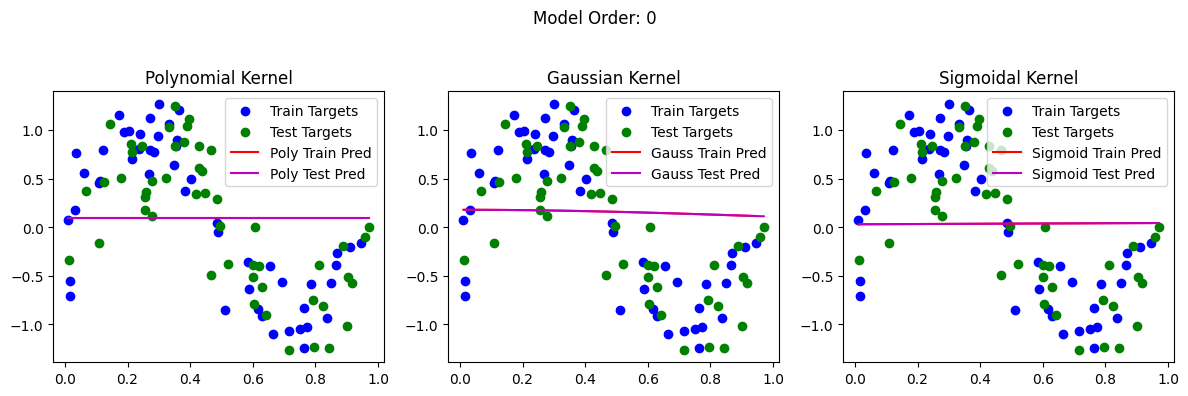

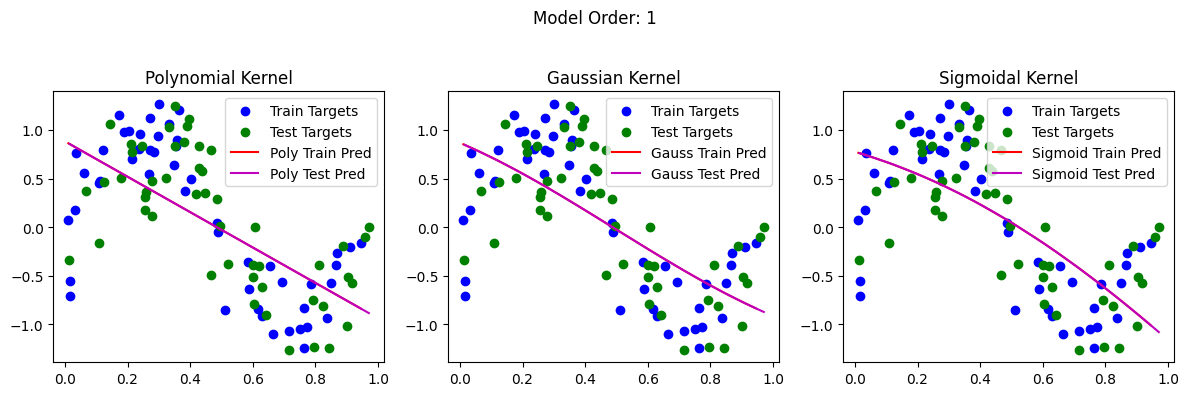

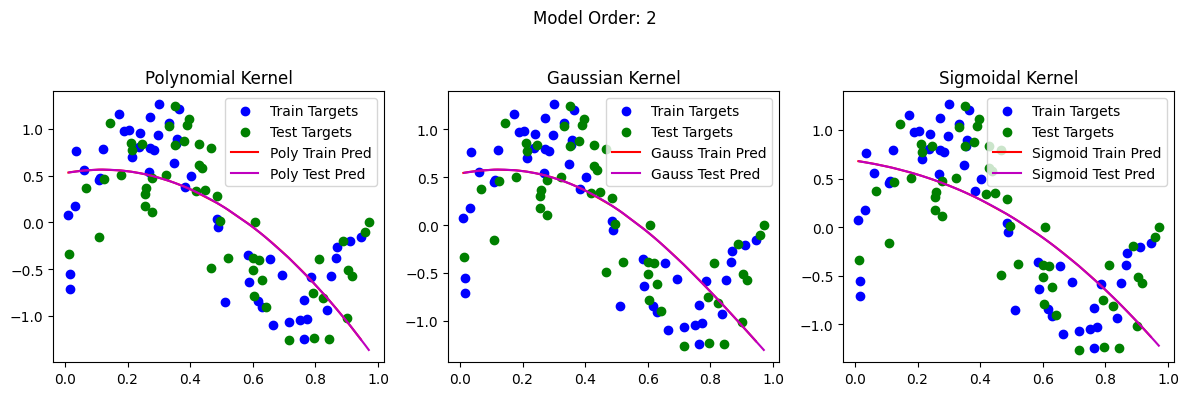

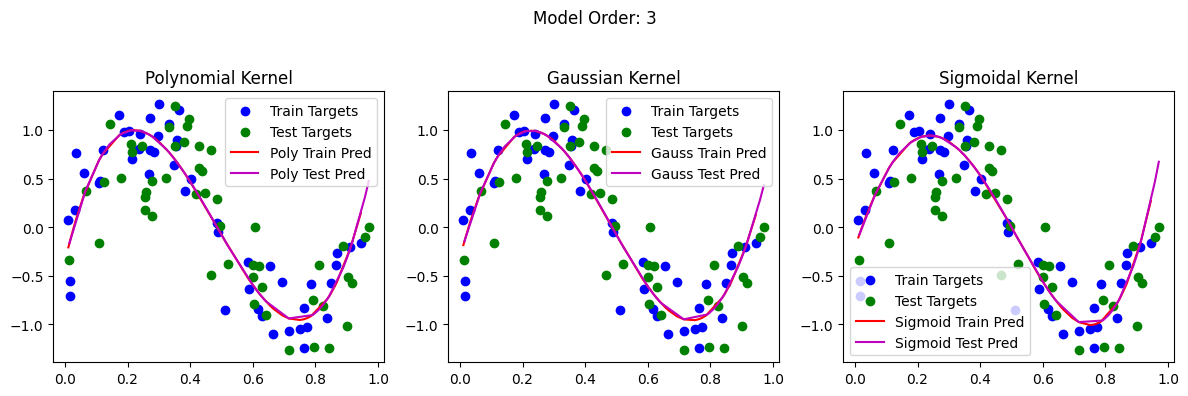

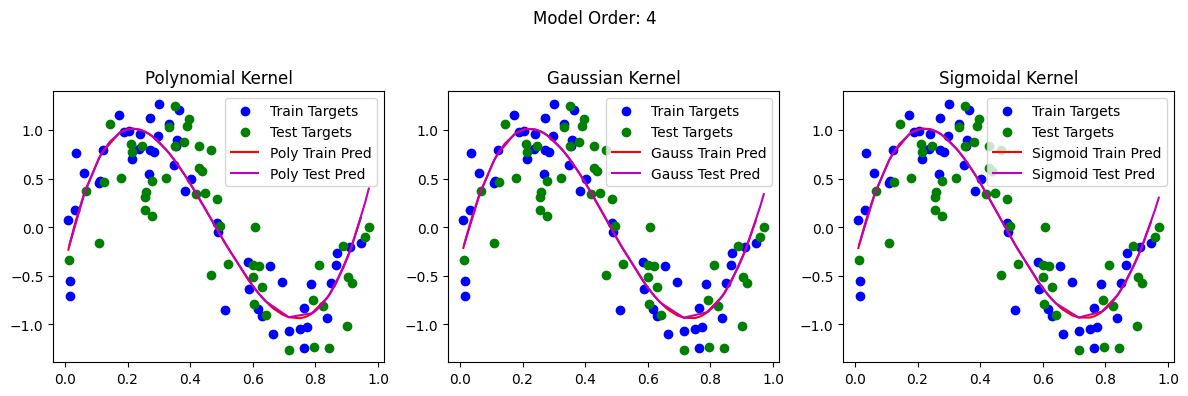

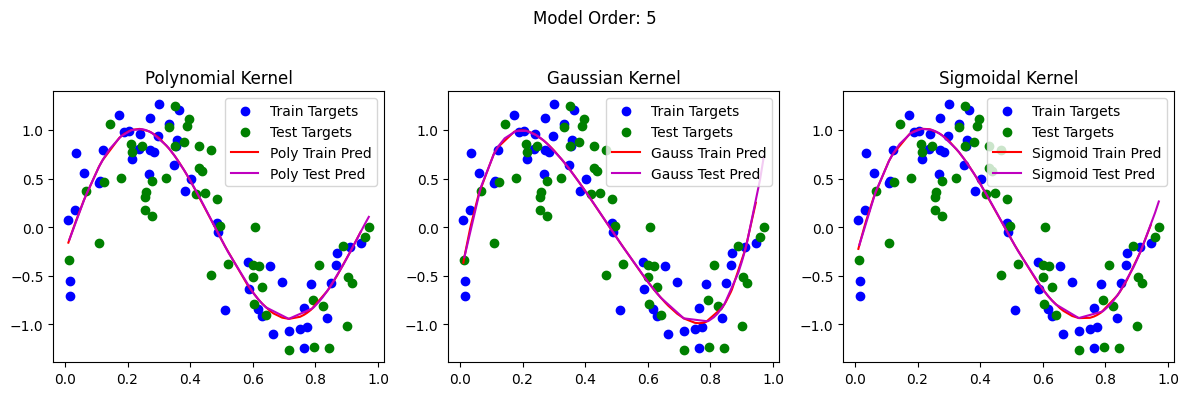

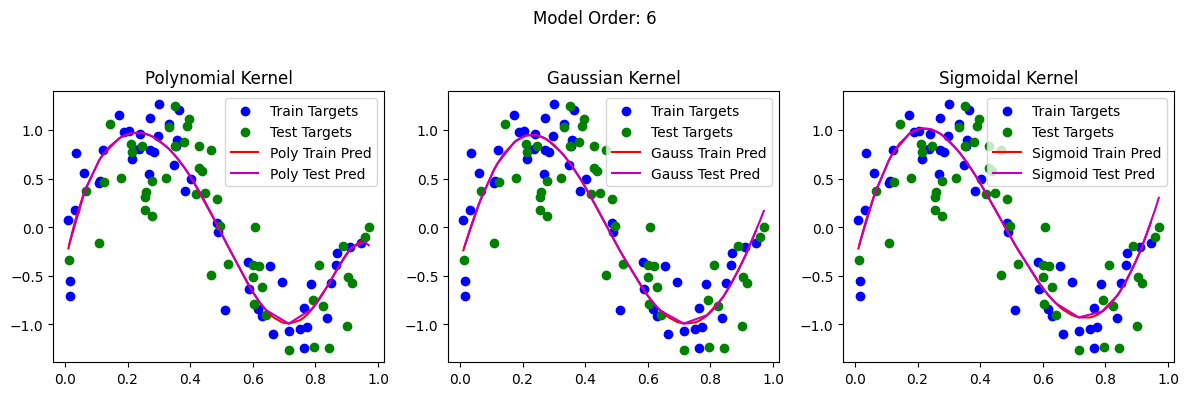

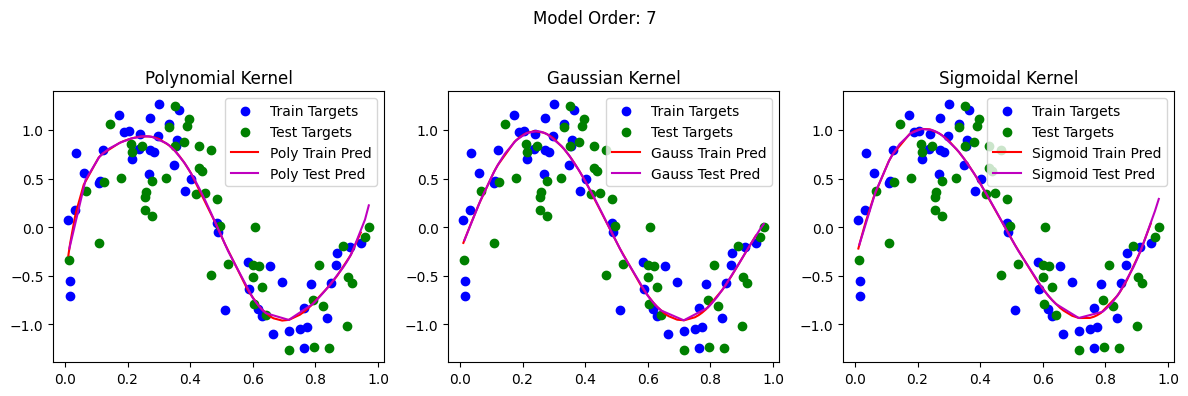

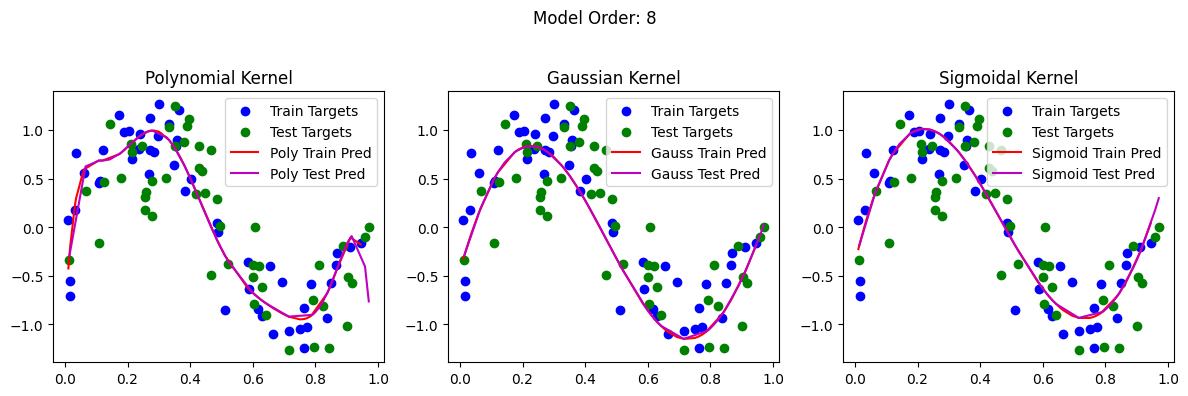

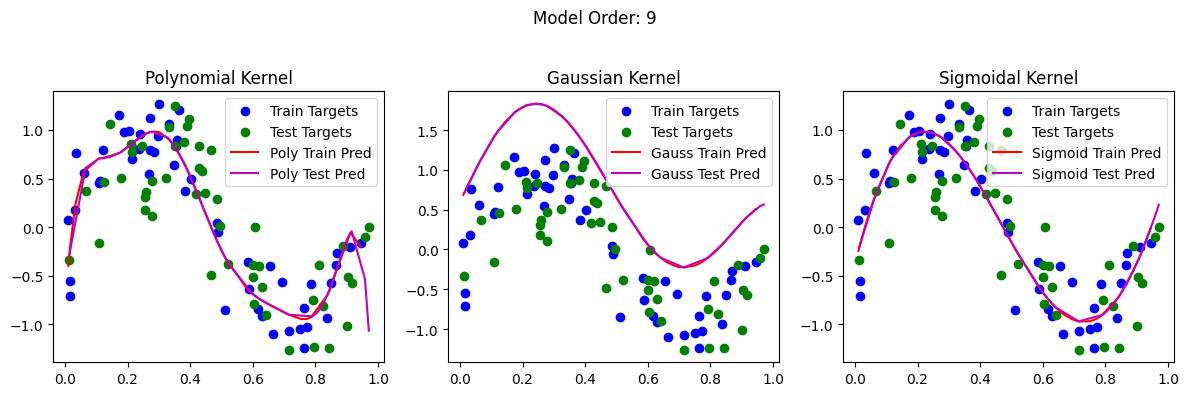

[4.862502914634013, 5.911095543614666, 6.3651927763534735, 6.704035725720055, 6.70485852506118, 6.718357940672542, 6.7132551747377205, 6.759748204294459, 6.788080750632085, 6.858559713866019]


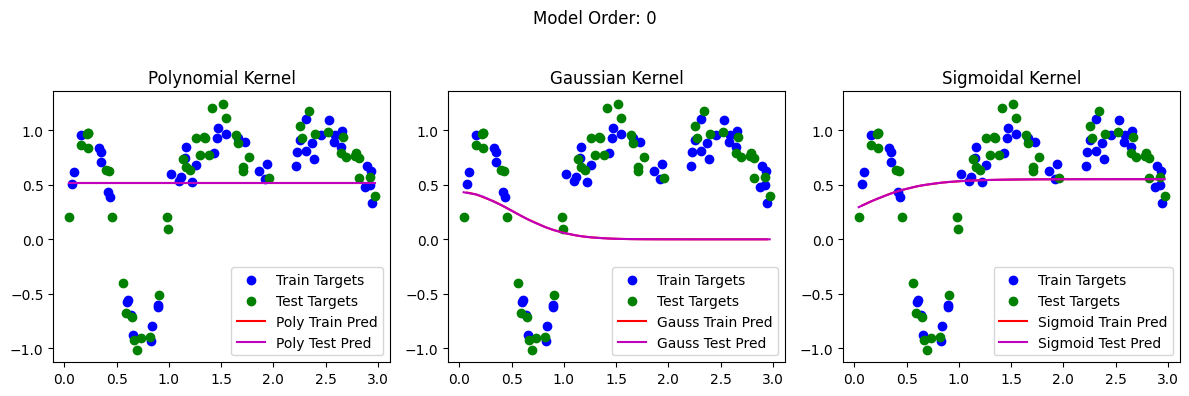

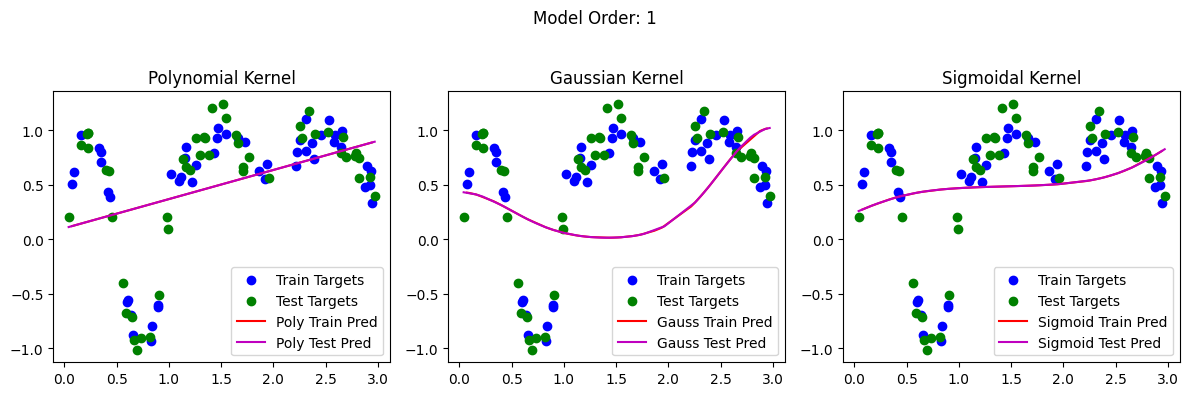

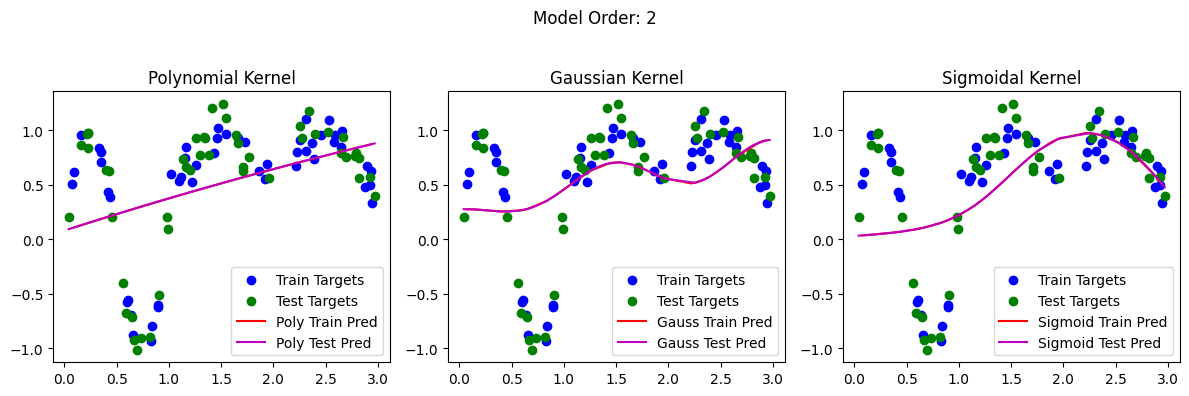

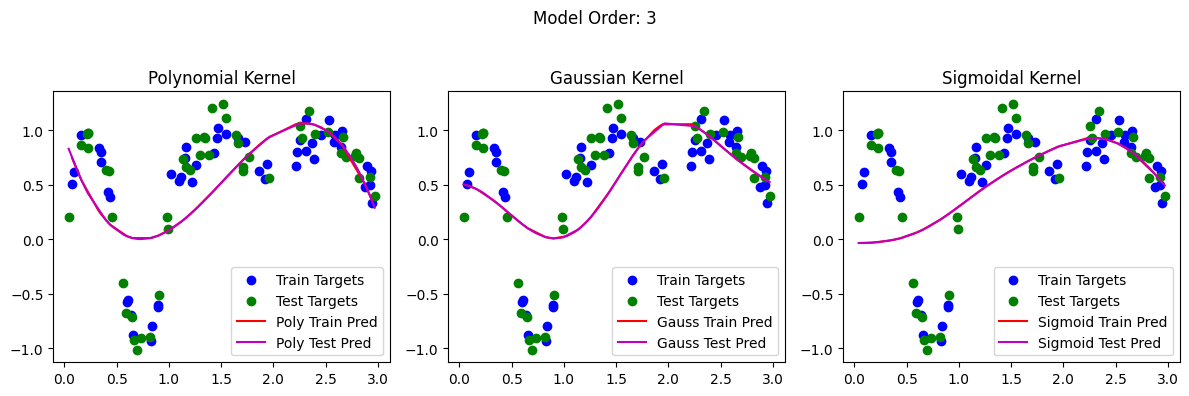

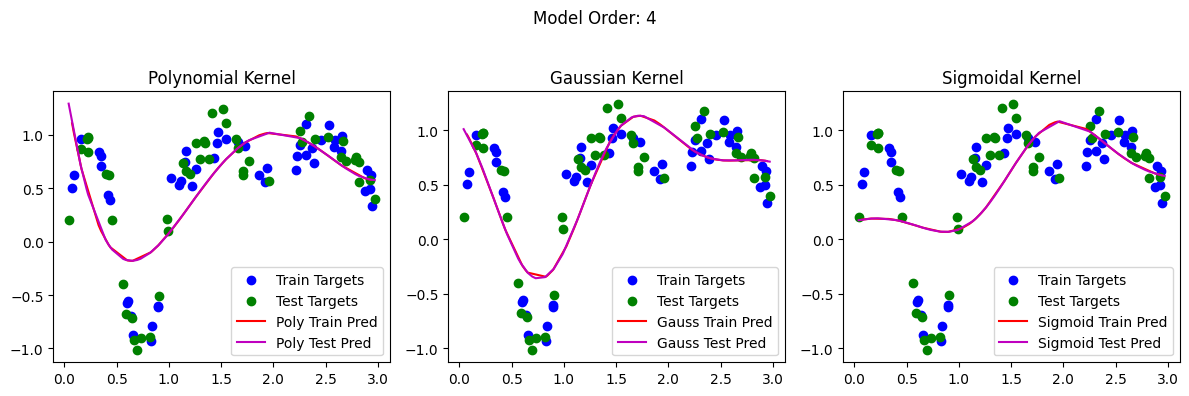

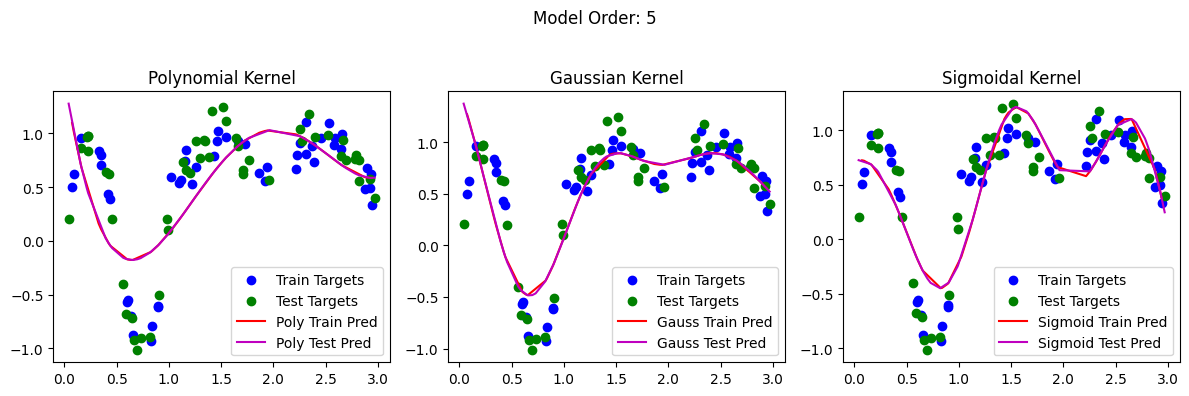

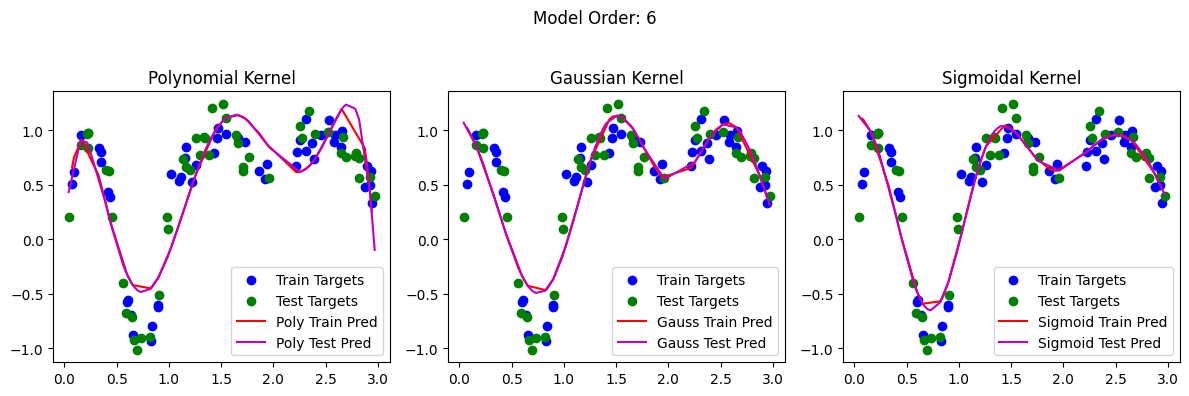

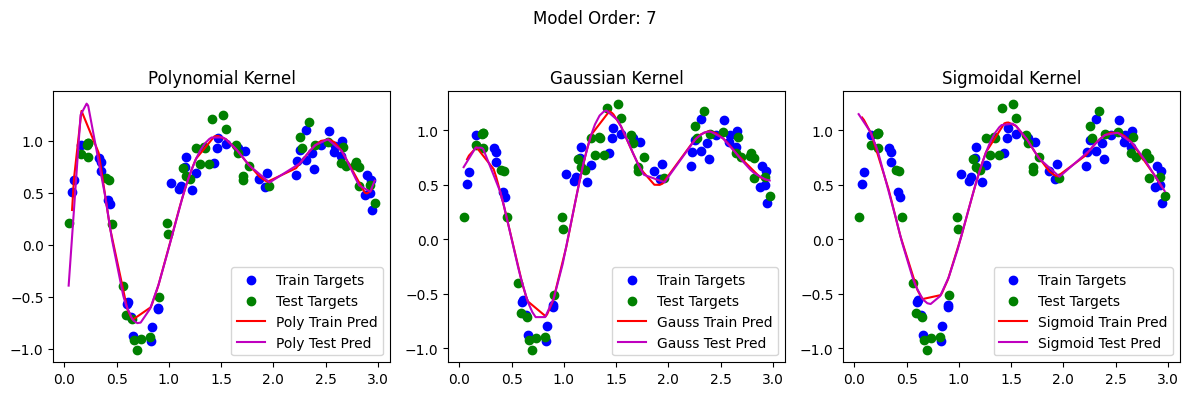

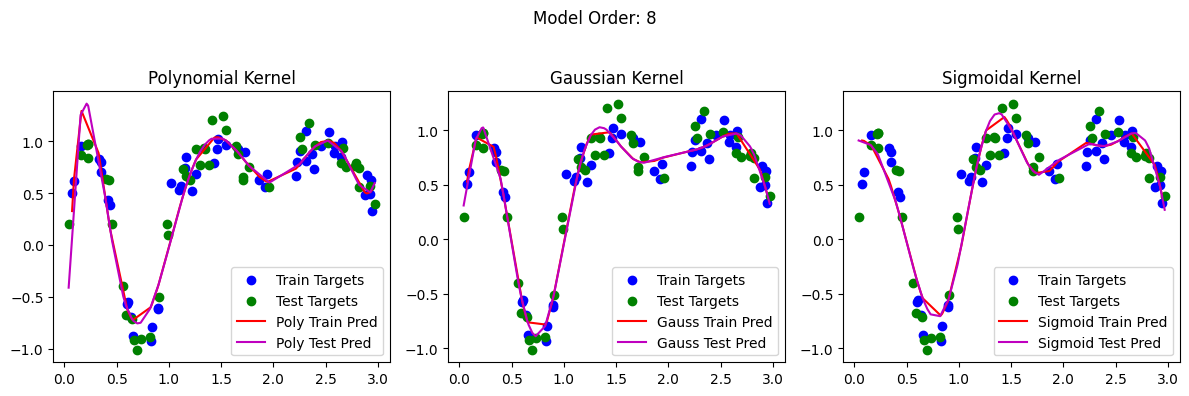

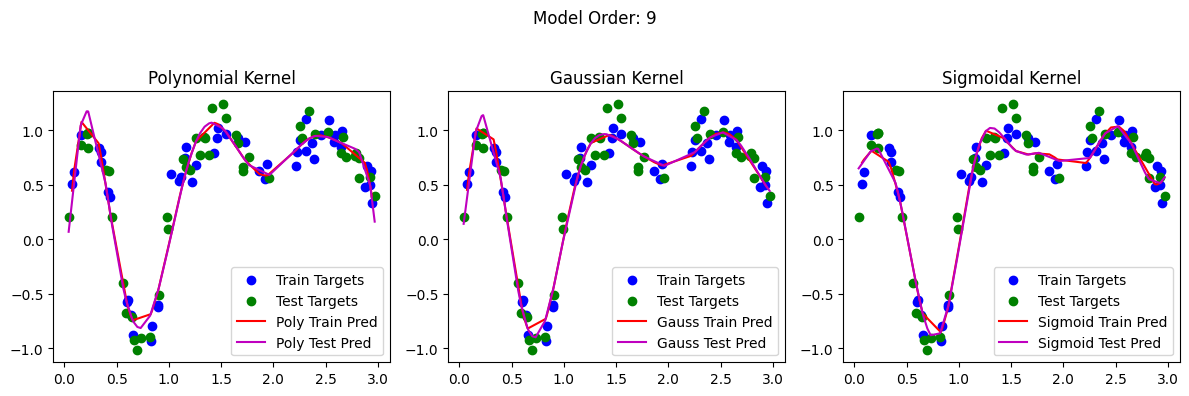

In [30]:
#Understanding the choice of kernel
########################################
#Generate 100 data points
########################################
def create_data(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = rng.uniform(0, 1, size)
    ts = np.sin(2*np.pi*xs) + e

    # Obtain train and test splits
    half = int(size*0.5)
    x_train = xs[:half]
    x_test = xs[half:]
    y_train = ts[:half]
    y_test = ts[half:]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = create_data(100)

#Obtain train and test splits
#Take even samples for training and odd samples for testing
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoidal_featurize(scalar, M):
  means = np.linspace(0, 1, M+1)
  s = 1
  x_vector = np.array([sigmoid((scalar-means[i])/s) for i in range(M+1)])
  return x_vector

def gaussian_featurize(scalar, M):
  means = np.linspace(0, 1, M+1)
  s = 1
  x_vector = np.array([np.exp((-(scalar-means[i])**2)/(2*(s**2))) for i in range(M+1)]).reshape(-1)

  return x_vector

def gaussian_featurize_piecewise(scalar, M):
  means = np.linspace(0,3, M+1)
  s = 0.5
  x_vector = np.array([np.exp((-(scalar-means[i])**2)/(2*(s**2))) for i in range(M+1)]).reshape(-1)

  return x_vector

def sigmoidal_featurize_piecewise(scalar, M):
  means = np.linspace(0, 3, M+1)
  s = 0.3
  x_vector = np.array([sigmoid((scalar-means[i])/s) for i in range(M+1)])
  return x_vector

#Function to estimate the parameters
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda, piecewise=False): #(training data, training targets, type of kernel, regularization coefficient)
    #kernelType : {Polynomial, Gaussian, Sigmoid}
    if kernelType == 'polynomial':
        # Use polynomial kernel to transform the data
        phi = np.array([featurize(X_train[i], M) for i in range(len(X_train))])

    elif kernelType == 'gaussian':
        # Use Gaussian kernel to transform the data
        if piecewise == False: 
          phi = np.array([gaussian_featurize(X_train[i], M) for i in range(len(X_train))])
        else:
           phi = np.array([gaussian_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])

    elif kernelType == 'sigmoidal':
        # Use Sigmoid kernel to transform the data
        if piecewise == False:
          phi = np.array([sigmoidal_featurize(X_train[i], M) for i in range(len(X_train))])
        else:
          phi = np.array([sigmoidal_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])



    # Ensure Y_train is a column vector
    Y_train = Y_train.reshape(-1, 1)

    # Estimate weights using Pseudo inverse solution
    identity = np.identity(phi.shape[1])
    w_opt = np.linalg.inv(phi.T @ phi + lamda * identity) @ (phi.T @ Y_train)

    # Return the estimated weights
    return w_opt

#Function to compute the training and testing errors from the current weight estimates
def KernelRegressionPred_Error(w_est,X_train,Y_train,X_test,Y_test,kernelType, piecewise=False):
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    X_tr = []
    X_te = []
    #X_train = np.reshape(X_train, (1,-1))
    #Y_train = np.reshape(Y_train, (1,-1))
    #X_test = np.reshape(X_test, (1,-1))
    #Y_test = np.reshape(Y_test, (1,-1))
    M = len(w_est)-1
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data
      x_test = np.array([featurize(X_test[i], M) for i in range(len(X_test))])
      x_train = np.array([featurize(X_train[i], M) for i in range(len(X_train))])
      
    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data
      if piecewise == False:
        x_test = np.array([gaussian_featurize(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([gaussian_featurize(X_train[i], M) for i in range(len(X_train))])
      else:        
        x_test = np.array([gaussian_featurize_piecewise(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([gaussian_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])
    if kernelType=='sigmoidal':
      #Use Sigmoid kernel to transform the data
      if piecewise == False:
        x_test = np.array([sigmoidal_featurize(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([sigmoidal_featurize(X_train[i], M) for i in range(len(X_train))])
      else: 
        x_test = np.array([sigmoidal_featurize_piecewise(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([sigmoidal_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])
    #Estimate training and testing targets
    test_pred = x_test @ w_est
    train_pred = x_train @ w_est

    TrainError = np.linalg.norm(train_pred - Y_train) / (len(train_pred) ** 0.5)
    TestError = np.linalg.norm(test_pred - Y_test) / (len(test_pred) ** 0.5)

    #Compute and return the training and testing errors
    return TrainError,TestError


#Iterate through range of M values
M_range=list(range(10))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []




for M in M_range:
    # Fit Mth order polynomial using three kernels i.e {Polynomial, Gaussian, Sigmoid}

    w_polynomial = KernelRegressionFit(x_train, y_train, 'polynomial', M, 0)
    w_gaussian = KernelRegressionFit(x_train, y_train, 'gaussian', M, 0)
    w_sigmoidal = KernelRegressionFit(x_train, y_train, 'sigmoidal', M, 0)
    
    tr_err_poly, te_err_poly = KernelRegressionPred_Error(w_polynomial, x_train, y_train, x_test, y_test, 'polynomial')
    tr_err_gauss, te_err_gauss = KernelRegressionPred_Error(w_gaussian, x_train, y_train, x_test, y_test, 'gaussian')
    tr_err_sig, te_err_sig = KernelRegressionPred_Error(w_sigmoidal, x_train, y_train, x_test, y_test, 'sigmoidal')

    polynomial_tr_error.append(tr_err_poly)
    polynomial_te_error.append(te_err_poly)
    gaussian_tr_error.append(tr_err_gauss)
    gaussian_te_error.append(te_err_gauss)
    sigmoid_tr_error.append(tr_err_sig)
    sigmoid_te_error.append(te_err_sig)

    # Predict training and testing targets using estimated w
    # For polynomial kernel:
    poly_train_pred = np.array([featurize(x, M) for x in x_train]) @ w_polynomial
    poly_test_pred  = np.array([featurize(x, M) for x in x_test]) @ w_polynomial

    # For gaussian kernel:
    gauss_train_pred = np.array([gaussian_featurize(x, M) for x in x_train]) @ w_gaussian
    gauss_test_pred  = np.array([gaussian_featurize(x, M) for x in x_test]) @ w_gaussian

    # For sigmoidal kernel:
    sig_train_pred = np.array([sigmoidal_featurize(x, M) for x in x_train]) @ w_sigmoidal
    sig_test_pred  = np.array([sigmoidal_featurize(x, M) for x in x_test]) @ w_sigmoidal

    # Sort the data for plotting
    sorted_train_indices = np.argsort(x_train)
    sorted_test_indices = np.argsort(x_test)

    x_train_sorted = x_train[sorted_train_indices]
    x_test_sorted = x_test[sorted_test_indices]

    poly_train_pred_sorted = poly_train_pred[sorted_train_indices]
    poly_test_pred_sorted = poly_test_pred[sorted_test_indices]

    gauss_train_pred_sorted = gauss_train_pred[sorted_train_indices]
    gauss_test_pred_sorted = gauss_test_pred[sorted_test_indices]

    sig_train_pred_sorted = sig_train_pred[sorted_train_indices]
    sig_test_pred_sorted = sig_test_pred[sorted_test_indices]

    # Plot the predictions alongside the original targets for the current model order
    plt.figure(figsize=(12,4))
    plt.suptitle(f'Model Order: {M}')

    plt.subplot(1,3,1)
    plt.scatter(x_train, y_train, label='Train Targets', color='blue')
    plt.scatter(x_test, y_test, label='Test Targets', color='green')
    plt.plot(x_train_sorted, poly_train_pred_sorted, 'r-', label='Poly Train Pred')
    plt.plot(x_test_sorted, poly_test_pred_sorted, 'm-', label='Poly Test Pred')
    plt.title('Polynomial Kernel')
    plt.legend()

    plt.subplot(1,3,2)
    plt.scatter(x_train, y_train, label='Train Targets', color='blue')
    plt.scatter(x_test, y_test, label='Test Targets', color='green')
    plt.plot(x_train_sorted, gauss_train_pred_sorted, 'r-', label='Gauss Train Pred')
    plt.plot(x_test_sorted, gauss_test_pred_sorted, 'm-', label='Gauss Test Pred')
    plt.title('Gaussian Kernel')
    plt.legend()

    plt.subplot(1,3,3)
    plt.scatter(x_train, y_train, label='Train Targets', color='blue')
    plt.scatter(x_test, y_test, label='Test Targets', color='green')
    plt.plot(x_train_sorted, sig_train_pred_sorted, 'r-', label='Sigmoid Train Pred')
    plt.plot(x_test_sorted, sig_test_pred_sorted, 'm-', label='Sigmoid Test Pred')
    plt.title('Sigmoidal Kernel')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    #Predict errors on both training and testing data using estimated w



    #Store them for plotting

print(polynomial_te_error)
#Plot the predicted training and testing targets alongside the original targets for various model orders and all three different kernels.




#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels




########################################
#Repeat the experiments by changing target function
########################################
   

def generate_piecewise_data(size):
    x = rng.uniform(0, 3, size)
    y = np.zeros_like(x)

    for i in range(size):
        if 0 <= x[i] < 1:
            y[i] = np.sin(2 * np.pi * x[i]) + rng.normal(0, 0.1)
        elif 1 <= x[i] < 2:
            y[i] = -np.abs(x[i] - 1.5) + 1 + rng.normal(0, 0.1)
        elif 2 <= x[i] < 3:
            y[i] = np.exp(-0.5 * ((x[i] - 2.5) / 0.4) ** 2) + rng.normal(0, 0.1)

    # Obtain train and test splits
    half = int(size * 0.5)
    x_train = x[:half]
    x_test = x[half:]
    y_train = y[:half]
    y_test = y[half:]

    return x_train, x_test, y_train, y_test

x_train_new, x_test_new, y_train_new, y_test_new = generate_piecewise_data(100)
M_range=list(range(10))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

for M in M_range:
    # Fit Mth order polynomial using three kernels i.e {Polynomial, Gaussian, Sigmoid}

    w_polynomial = KernelRegressionFit(x_train_new, y_train_new, 'polynomial', M, 0)
    w_gaussian = KernelRegressionFit(x_train_new, y_train_new, 'gaussian', M, 0, piecewise=True)
    w_sigmoidal = KernelRegressionFit(x_train_new, y_train_new, 'sigmoidal', M, 0, piecewise=True)
    
    tr_err_poly, te_err_poly = KernelRegressionPred_Error(w_polynomial, x_train_new, y_train_new, x_test_new, y_test_new, 'polynomial')
    tr_err_gauss, te_err_gauss = KernelRegressionPred_Error(w_gaussian, x_train_new, y_train_new, x_test_new, y_test_new, 'gaussian', piecewise=True)
    tr_err_sig, te_err_sig = KernelRegressionPred_Error(w_sigmoidal, x_train_new, y_train_new, x_test_new, y_test_new, 'sigmoidal', piecewise=True)

    polynomial_tr_error.append(tr_err_poly)
    polynomial_te_error.append(te_err_poly)
    gaussian_tr_error.append(tr_err_gauss)
    gaussian_te_error.append(te_err_gauss)
    sigmoid_tr_error.append(tr_err_sig)
    sigmoid_te_error.append(te_err_sig)

    # Predict training and testing targets using estimated w
    # For polynomial kernel:
    poly_train_new_pred = np.array([featurize(x, M) for x in x_train_new]) @ w_polynomial
    poly_test_new_pred  = np.array([featurize(x, M) for x in x_test_new]) @ w_polynomial

    # For gaussian kernel:
    gauss_train_pred = np.array([gaussian_featurize_piecewise(x, M) for x in x_train_new]) @ w_gaussian
    gauss_test_pred  = np.array([gaussian_featurize_piecewise(x, M) for x in x_test_new]) @ w_gaussian

    # For sigmoidal kernel:
    sig_train_pred = np.array([sigmoidal_featurize_piecewise(x, M) for x in x_train_new]) @ w_sigmoidal
    sig_test_pred  = np.array([sigmoidal_featurize_piecewise(x, M) for x in x_test_new]) @ w_sigmoidal

    # Sort the data for plotting
    sorted_train_indices = np.argsort(x_train_new)
    sorted_test_indices = np.argsort(x_test_new)

    x_train_new_sorted = x_train_new[sorted_train_indices]
    x_test_new_sorted = x_test_new[sorted_test_indices]

    poly_train_new_pred_sorted = poly_train_new_pred[sorted_train_indices]
    poly_test_new_pred_sorted = poly_test_new_pred[sorted_test_indices]

    gauss_train_pred_sorted = gauss_train_pred[sorted_train_indices]
    gauss_test_pred_sorted = gauss_test_pred[sorted_test_indices]

    sig_train_pred_sorted = sig_train_pred[sorted_train_indices]
    sig_test_pred_sorted = sig_test_pred[sorted_test_indices]

    # Plot the predictions alongside the original targets for the current model order
    plt.figure(figsize=(12,4))
    plt.suptitle(f'Model Order: {M}')

    plt.subplot(1,3,1)
    plt.scatter(x_train_new, y_train_new, label='Train Targets', color='blue')
    plt.scatter(x_test_new, y_test_new, label='Test Targets', color='green')
    plt.plot(x_train_new_sorted, poly_train_new_pred_sorted, 'r-', label='Poly Train Pred')
    plt.plot(x_test_new_sorted, poly_test_new_pred_sorted, 'm-', label='Poly Test Pred')
    plt.title('Polynomial Kernel')
    plt.legend()

    plt.subplot(1,3,2)
    plt.scatter(x_train_new, y_train_new, label='Train Targets', color='blue')
    plt.scatter(x_test_new, y_test_new, label='Test Targets', color='green')
    plt.plot(x_train_new_sorted, gauss_train_pred_sorted, 'r-', label='Gauss Train Pred')
    plt.plot(x_test_new_sorted, gauss_test_pred_sorted, 'm-', label='Gauss Test Pred')
    plt.title('Gaussian Kernel')
    plt.legend()

    plt.subplot(1,3,3)
    plt.scatter(x_train_new, y_train_new, label='Train Targets', color='blue')
    plt.scatter(x_test_new, y_test_new, label='Test Targets', color='green')
    plt.plot(x_train_new_sorted, sig_train_pred_sorted, 'r-', label='Sigmoid Train Pred')
    plt.plot(x_test_new_sorted, sig_test_pred_sorted, 'm-', label='Sigmoid Test Pred')
    plt.title('Sigmoidal Kernel')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    #Predict errors on both training and testing data using estimated w



    #Store them for plotting












Observation 1: Polynomial kernels tend to fit the training data well but may not generalize as effectively to the testing data, especially for higher degrees.

Observation 2: Gaussian kernels provide a smoother fit and generally perform better on the testing data compared to polynomial kernels, especially for complex functions.

Observation 3: Sigmoidal kernels can capture non-linear relationships but may require careful tuning of parameters to achieve good performance.

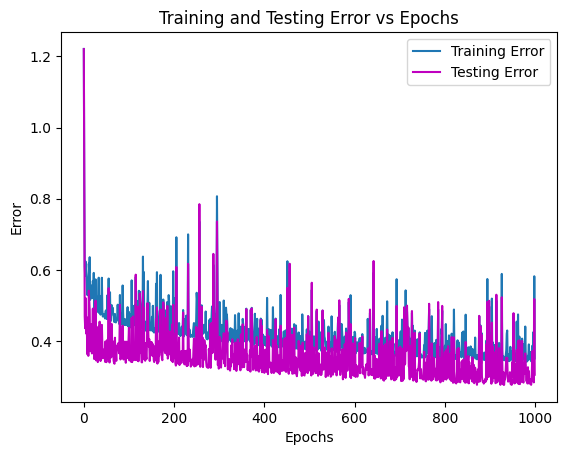

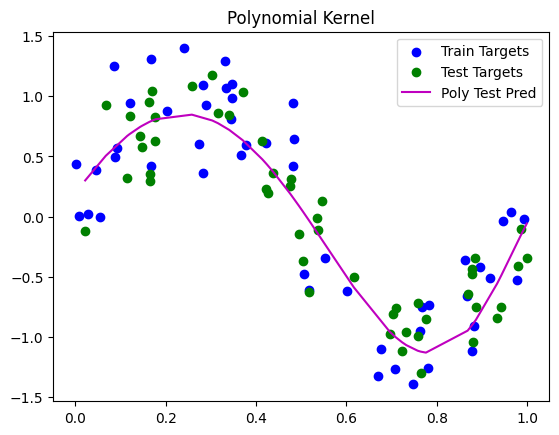

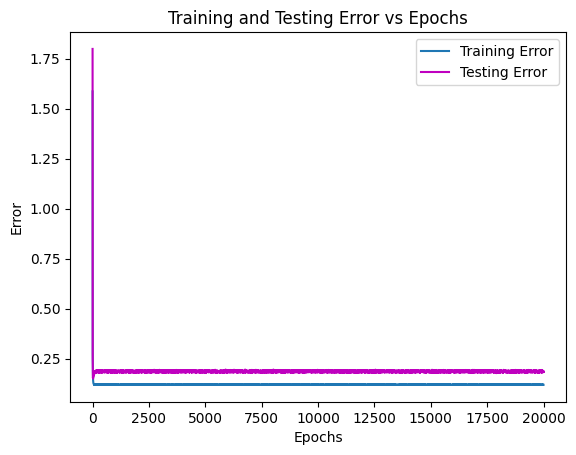

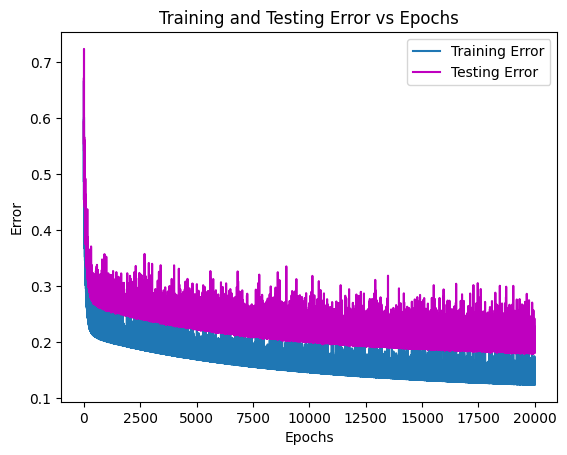

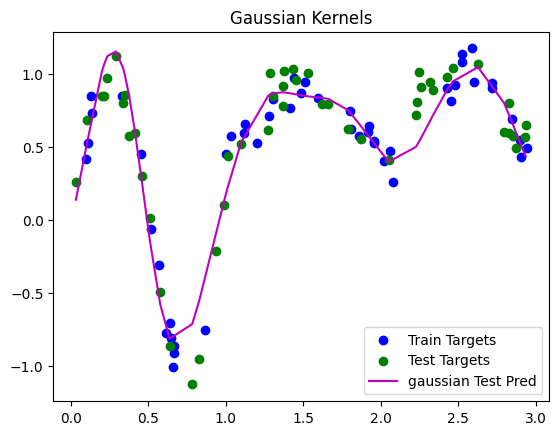

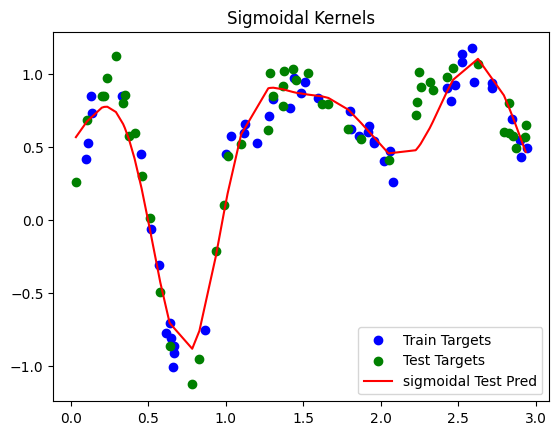

In [27]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=12345)

def create_data(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = rng.uniform(0, 1, size)
    ts = np.sin(2*np.pi*xs) + e

    # Obtain train and test splits
    half = int(size*0.5)
    x_train = xs[:half]
    x_test = xs[half:]
    y_train = ts[:half]
    y_test = ts[half:]

    return x_train, x_test, y_train, y_test
    
def featurize(x_scalar, M):
    x_vector = np.zeros(M+1)
    for j in range(M+1):
        x_vector[j] = x_scalar ** j
    return x_vector

def gaussian_featurize_piecewise(x_scalar, M):
    # Adjust means to span the entire domain [0, 3]
    means = np.linspace(0, 3, M+1)
    # Increase bandwidth for wider coverage
    s = 0.2  # Larger bandwidth
    x_vector = np.array([np.exp(-0.5 * ((x_scalar - mean) / s) ** 2) for mean in means])
    return x_vector

def sigmoidal_featurize_piecewise(scalar, M):
    means = np.linspace(0, 3, M+1)
    s = 0.2
    x_vector = np.array([sigmoid((scalar-means[i])/s) for i in range(M+1)])
    return x_vector

def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType, lamda, piecewise=False):
    M = len(w_est) - 1
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data
      x_test = np.array([featurize(X_test[i], M) for i in range(len(X_test))])
      x_train = np.array([featurize(X_train[i], M) for i in range(len(X_train))])
      
    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data
      if piecewise == False:
        x_test = np.array([gaussian_featurize(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([gaussian_featurize(X_train[i], M) for i in range(len(X_train))])
      else:        
        x_test = np.array([gaussian_featurize_piecewise(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([gaussian_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])
    if kernelType=='sigmoidal':
      #Use Sigmoid kernel to transform the data
      if piecewise == False:
        x_test = np.array([sigmoidal_featurize(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([sigmoidal_featurize(X_train[i], M) for i in range(len(X_train))])
      else: 
        x_test = np.array([sigmoidal_featurize_piecewise(X_test[i], M) for i in range(len(X_test))])
        x_train = np.array([sigmoidal_featurize_piecewise(X_train[i], M) for i in range(len(X_train))])

    test_pred = x_test @ w_est
    train_pred = x_train @ w_est

    TrainError = np.linalg.norm(train_pred - Y_train) / (len(train_pred) ** 0.5) + (lamda/2) * np.linalg.norm(w_est)
    TestError = np.linalg.norm(test_pred - Y_test) / (len(test_pred) ** 0.5) + (lamda/2) * np.linalg.norm(w_est)

    return TrainError, TestError

def ErrorPredBatch(w_est, phi_train, Y_train, kernelType):
    train_pred = phi_train @ w_est
    error_vector = Y_train.reshape(-1, 1) - train_pred.reshape(-1, 1)
    return error_vector

def OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize, lamda, flag=False, piecewise=False):
    weights = np.random.randn(M+1)
    TrError = []
    TeError = []
    epochs = range(Epochs)
    kernel = kernelType

    for epoch in epochs:
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernel, lamda, piecewise)
        TrError.append(tr_err)
        TeError.append(te_err)
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        Y_train_shuffled = Y_train[permutation]

        for batch in range(0, len(X_train), BatchSize):

            X_train_batch = X_train_shuffled[batch:batch + BatchSize]
            Y_train_batch = Y_train_shuffled[batch:batch + BatchSize]

            if kernelType == 'polynomial':
                phi_batch = np.array([featurize(X_train_batch[i], M) for i in range(len(X_train_batch))])
            elif kernelType == 'gaussian':
                if not piecewise:
                    phi_batch = np.array([gaussian_featurize(X_train_batch[i], M) for i in range(len(X_train_batch))])
                else: 
                   phi_batch = np.array([gaussian_featurize_piecewise(X_train_batch[i], M) for i in range(len(X_train_batch))])
            elif kernelType == 'sigmoidal':
                if not piecewise:                   
                    phi_batch = np.array([sigmoidal_featurize(X_train_batch[i], M) for i in range(len(X_train_batch))])
                else:
                    phi_batch = np.array([sigmoidal_featurize_piecewise(X_train_batch[i], M) for i in range(len(X_train_batch))])

            Y_train_batch = Y_train_batch.reshape(-1, 1)
            error = ErrorPredBatch(weights, phi_batch, Y_train_batch, kernelType)
            
            gradient = -(phi_batch.T @ error).flatten() + lamda * weights
            weights -= stepSize * gradient
            # if epoch == 0:
            #     print("initial weights: ", weights)
            #     if batch == 0:
            #         print("gradient: ", gradient)
            #         print("update: ", stepSize*gradient)
            #         print("weights after the first update: ", weights)
            #         print("error: ", error)
            #         print("phi_batch.T: ", phi_batch.T)
            #         break


    if flag==True:
        plt.plot(epochs, TrError, label='Training Error')
        plt.plot(epochs, TeError, c='m', label='Testing Error')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.title('Training and Testing Error vs Epochs')
        plt.legend()
        plt.show()

    return weights

x_train, x_test, y_train, y_test = create_data(100)
weights = OnlineTraining(x_train, y_train, x_test, y_test, 'polynomial', 10, 1000, 5, 0.1,0, flag=True)

poly_train_pred = np.array([featurize(x, 10) for x in x_train]) @ weights
poly_test_pred  = np.array([featurize(x, 10) for x in x_test]) @ weights

    # Sort the data for plotting
sorted_train_indices = np.argsort(x_train)
sorted_test_indices = np.argsort(x_test)

x_train_sorted = x_train[sorted_train_indices]
x_test_sorted = x_test[sorted_test_indices]

poly_train_pred_sorted = poly_train_pred[sorted_train_indices]
poly_test_pred_sorted = poly_test_pred[sorted_test_indices]

plt.scatter(x_train, y_train, label='Train Targets', color='blue')
plt.scatter(x_test, y_test, label='Test Targets', color='green')
# plt.scatter(x_test, poly_test_pred, label='Predicted Targets', color='m')
# plt.plot(x_train_sorted, poly_train_pred_sorted, 'r-', label='Poly Train Pred')
plt.plot(x_test_sorted, poly_test_pred_sorted, 'm-', label='Poly Test Pred')
plt.title('Polynomial Kernel')
plt.legend()

plt.show()

x_train, x_test, y_train, y_test = generate_piecewise_data(100)
weights = OnlineTraining(x_train, y_train, x_test, y_test, 'gaussian', 10, 20000, 5, 1e-1, 0, flag=True, piecewise=True)
weights_sigmoidal = OnlineTraining(x_train, y_train, x_test, y_test, 'sigmoidal', 10, 20000, 5, 5e-2, 0, flag=True, piecewise=True)

gaussian_train_pred = np.array([gaussian_featurize_piecewise(x, 10) for x in x_train]) @ weights
gaussian_test_pred  = np.array([gaussian_featurize_piecewise(x, 10) for x in x_test]) @ weights

sigmoidal_train_pred = np.array([sigmoidal_featurize_piecewise(x, 10) for x in x_train]) @ weights_sigmoidal
sigmoidal_test_pred  = np.array([sigmoidal_featurize_piecewise(x, 10) for x in x_test]) @ weights_sigmoidal
    # Sort the data for plotting
sorted_train_indices = np.argsort(x_train)
sorted_test_indices = np.argsort(x_test)

x_train_sorted = x_train[sorted_train_indices]
x_test_sorted = x_test[sorted_test_indices]

gaussian_train_pred_sorted = gaussian_train_pred[sorted_train_indices]
gaussian_test_pred_sorted = gaussian_test_pred[sorted_test_indices]

sigmoidal_train_pred_sorted = sigmoidal_train_pred[sorted_train_indices]
sigmoidal_test_pred_sorted = sigmoidal_test_pred[sorted_test_indices]

plt.scatter(x_train, y_train, label='Train Targets', color='blue')
plt.scatter(x_test, y_test, label='Test Targets', color='green')
# plt.scatter(x_test, poly_test_pred, label='Predicted Targets', color='m')
# plt.plot(x_train_sorted, poly_train_pred_sorted, 'r-', label='Poly Train Pred')
plt.plot(x_test_sorted, gaussian_test_pred_sorted, 'm-', label='gaussian Test Pred')
plt.title('Gaussian Kernels')
plt.legend()

plt.show()


plt.scatter(x_train, y_train, label='Train Targets', color='blue')
plt.scatter(x_test, y_test, label='Test Targets', color='green')
plt.plot(x_test_sorted, sigmoidal_test_pred_sorted, 'r-', label='sigmoidal Test Pred')
plt.title('Sigmoidal Kernels')
plt.legend()
plt.show()

# def get_predictions(w_est, X_train, X_test, kernelType, M):
#     if kernelType == 'polynomial':
#         x_test = np.array([featurize(X_test[i], M) for i in range(len(X_test))])
#         x_train = np.array([featurize(X_train[i], M) for i in range(len(X_train))])
#     elif kernelType == 'gaussian':
#         x_test = np.array([gaussian_featurize(X_test[i], M) for i in range(len(X_test))])
#         x_train = np.array([gaussian_featurize(X_train[i], M) for i in range(len(X_train))])
#     elif kernelType == 'sigmoidal':
#         x_test = np.array([sigmoidal_featurize(X_test[i], M) for i in range(len(X_test))])
#         x_train = np.array([sigmoidal_featurize(X_train[i], M) for i in range(len(X_train))])

#     train_pred = x_train @ w_est
#     test_pred = x_test @ w_est

#     return train_pred, test_pred

# def plot_results(x_train, y_train, x_test, y_test, train_pred, test_pred, kernelType, axs, index):
#     axs[index].scatter(x_test, y_test, label='Test Data')
#     if kernelType == 'polynomial':
#         axs[index].plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'r-', label='True Function')
#     else:
#         axs[index].plot(np.linspace(0, 3, 300), np.piecewise(np.linspace(0, 3, 300), [np.linspace(0, 3, 300) < 1, (np.linspace(0, 3, 300) >= 1) & (np.linspace(0, 3, 300) < 2), np.linspace(0, 3, 300) >= 2],
#                                                               [lambda x: np.sin(2 * np.pi * x), lambda x: -np.abs(x - 1.5) + 1, lambda x: np.exp(-0.5 * ((x - 2.5) / 0.4) ** 2)]), 'r-', label='True Function')
#     axs[index].scatter(x_test, test_pred, c='m', label='Predicted Data')
#     axs[index].set_xlabel('x')
#     axs[index].set_ylabel('t')
#     axs[index].set_title(f'{kernelType.capitalize()} Kernel')
#     axs[index].legend()

Observation 1: Stochastic gradient descent (SGD) converges faster compared to batch gradient descent, especially for large datasets, due to frequent updates of the model parameters.

Observation 2: The choice of step size 
η
significantly affects the convergence of SGD; too large a step size can lead to oscillations, while too small a step size can slow down convergence.

Observation 3: Smaller batch sizes in SGD lead to noisier updates but can help escape local minima, whereas larger batch sizes provide more stable updates but may converge slower.

Observation 4: The weights do not converge if we use the polynomial kernels for the mixed target data. Hence I used only gaussian and sigmoidal kernels, both of which give a reasonable convergence. Also, since the number of epochs is quite large(20000), I haven't tried all M from 1 to 10, and instead only plotted the data for M=10. These two models already take a lot of time to train, so it doesn't make sense to experiment with all M from 1 to 10.

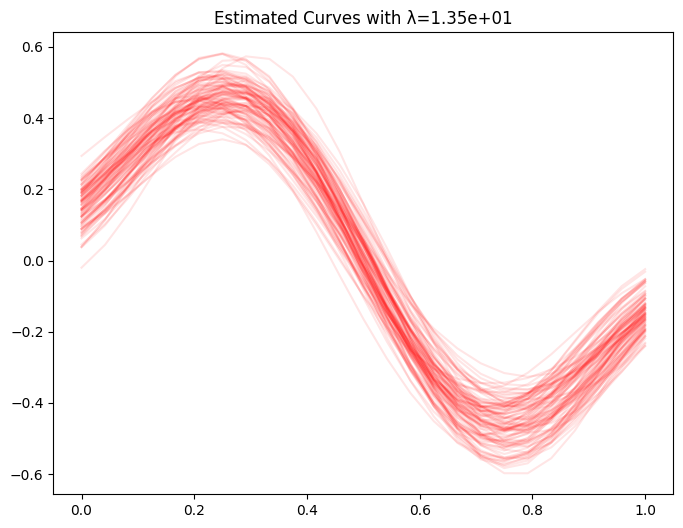

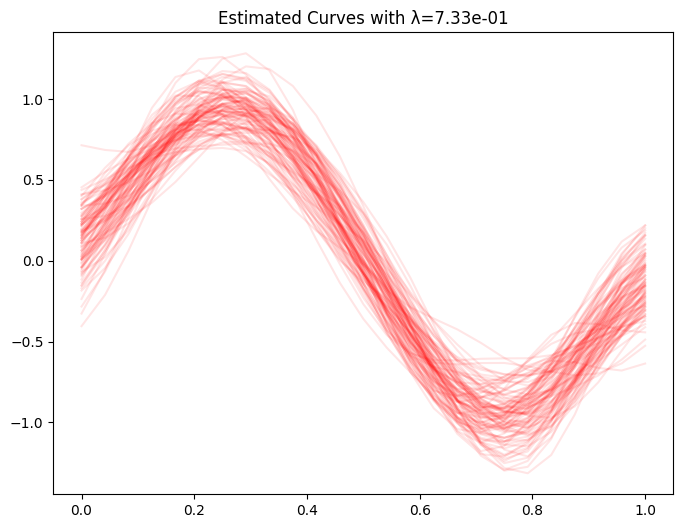

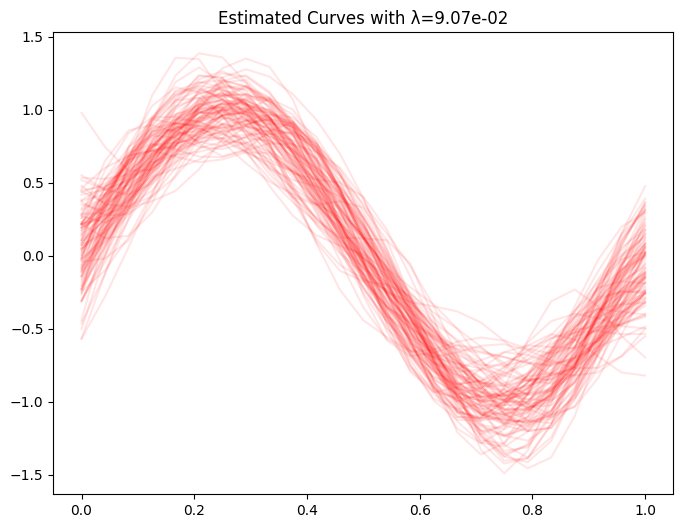

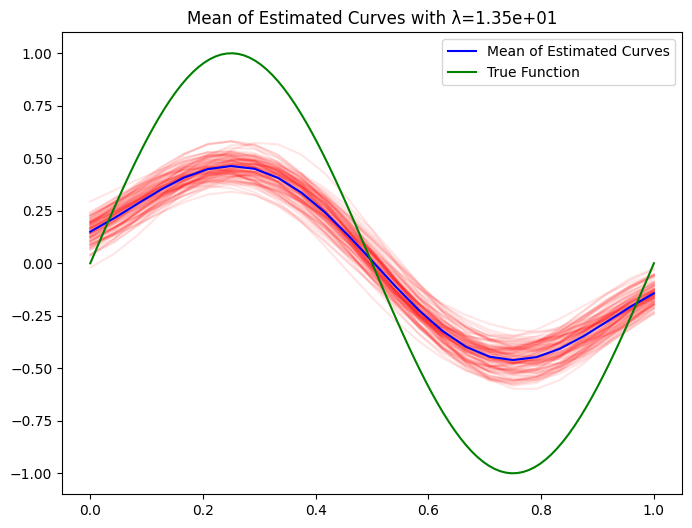

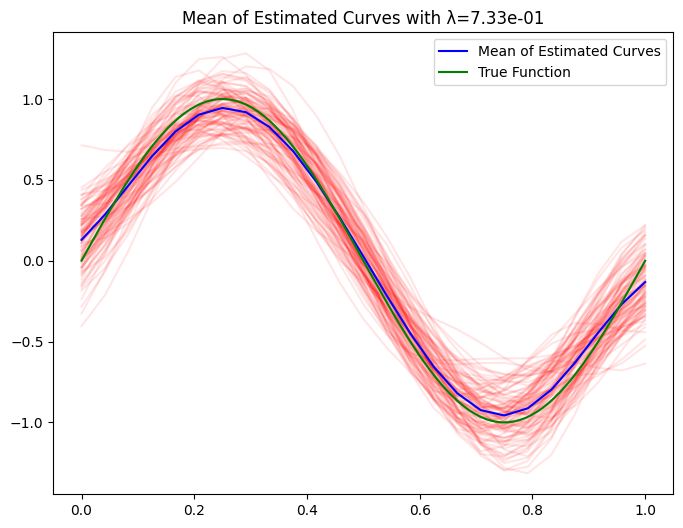

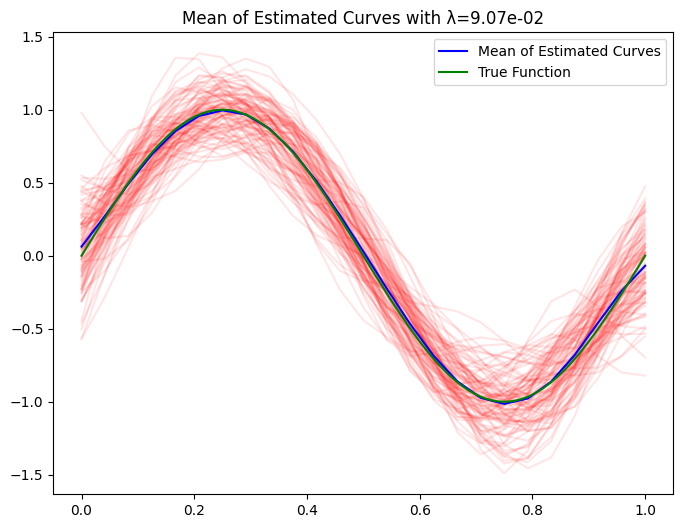

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=12345)

def create_data(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = np.linspace(0, 1, size)
    ts = np.sin(2*np.pi*xs) + e
    dataset = (xs, ts)
    return dataset

def gaussian_featurize(x_scalar, M):
    means = np.linspace(-1, 1, M)
    s = 0.1
    x_vector = np.array([np.exp(-0.5 * ((x_scalar - mean) / s) ** 2) for mean in means])
    return x_vector

def GaussianFit(X_train, Y_train, M, lamda, n):
    phi = np.zeros((n, M))
    for i in range(n):
        phi[i] = gaussian_featurize(X_train[i], M)
    identity = np.identity(phi.shape[1])
    Y_train = Y_train.reshape(-1, 1)
    w_opt = np.linalg.inv(phi.T @ phi + lamda * identity) @ (phi.T @ Y_train)
    return w_opt

def GaussianPred(w_est, X_train, M):
    x_train = np.array([gaussian_featurize(X_train[i], M) for i in range(X_train.shape[0])])
    TrainPred = x_train @ w_est
    return TrainPred

datasets = [create_data(25) for i in range(100)]

def sorted_data(x, pred):    
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    pred_sorted =  pred[sorted_indices]
    return x_sorted, pred_sorted

# Use regularized least squares to estimate w
lamdas = [np.exp(2.6), np.exp(-0.31), np.exp(-2.4)]

for lamda in lamdas:
    plt.figure(figsize=(8,6))
    for dataset in datasets:
        x = dataset[0]
        y = dataset[1]
        w = GaussianFit(x, y, 24, lamda, 25)
        pred = GaussianPred(w, x, 24)
        x_sorted, pred_sorted = sorted_data(x, pred)
        plt.plot(x_sorted, pred_sorted, c='r', alpha=0.1)
    plt.title(f'Estimated Curves with λ={lamda:.2e}')
    plt.show()

# Illustrate the concept of Bias-Variance trade-off
for lamda in lamdas:
    plt.figure(figsize=(8,6))
    all_preds = []
    for dataset in datasets:
        x = dataset[0]
        y = dataset[1]
        w = GaussianFit(x, y, 24, lamda, 25)
        pred = GaussianPred(w, x, 24)
        all_preds.append(pred)
        x_sorted, pred_sorted = sorted_data(x, pred)
        plt.plot(x_sorted, pred_sorted, c='r', alpha=0.1)
    
    mean_pred = np.mean(all_preds, axis=0)
    x_sorted, mean_pred_sorted = sorted_data(x, mean_pred)
    plt.plot(x_sorted, mean_pred_sorted, c='b', label='Mean of Estimated Curves')
    plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'g-', label='True Function')
    plt.title(f'Mean of Estimated Curves with λ={lamda:.2e}')
    plt.legend()
    plt.show()


Observation 1: Low regularization (low 
λ
) results in high variance, as evidenced by the wide spread of estimated curves, but low bias, as the mean of the estimated curves is close to the true function.

Observation 2: High regularization (high 
λ
) results in high bias, as the mean of the estimated curves deviates from the true function, but low variance, as the spread of the curves is narrow.

Observation 3: Moderate regularization (middle 
λ
) provides a balance between bias and variance, resulting in a mean curve that is close to the true function with a reasonable spread.

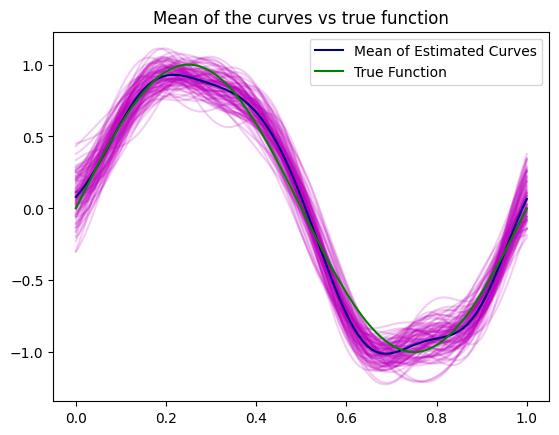

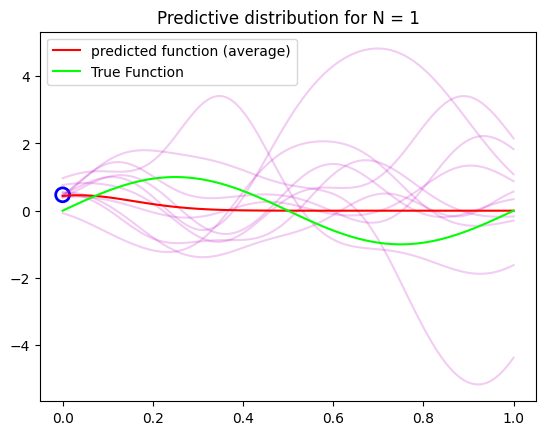

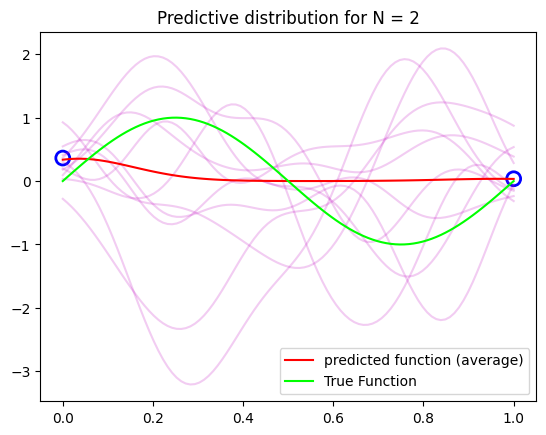

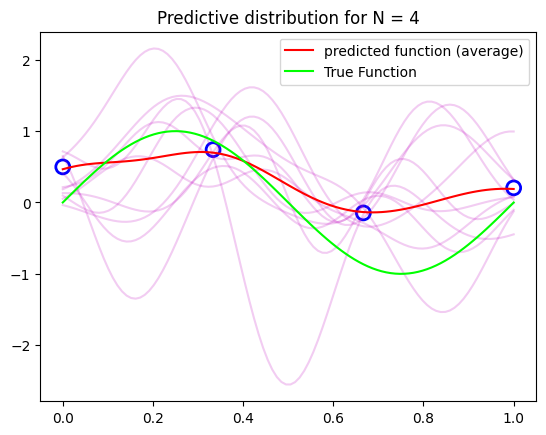

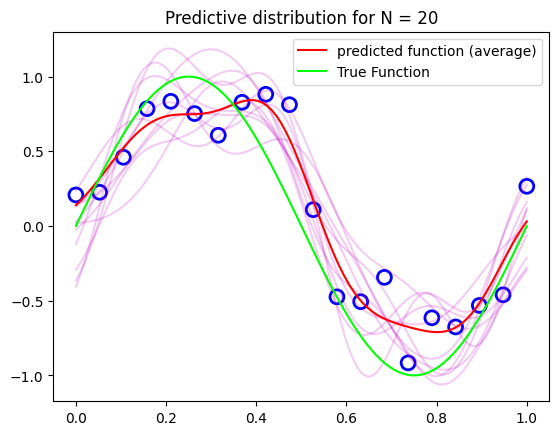

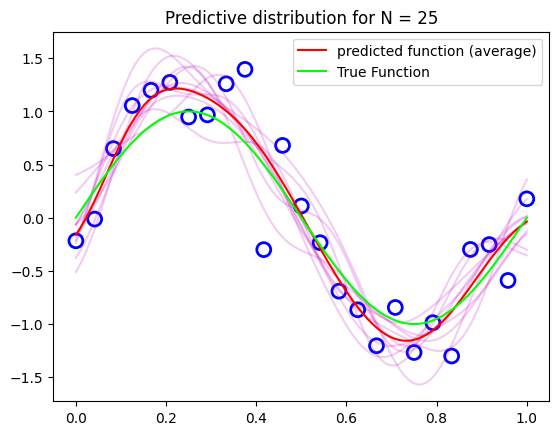

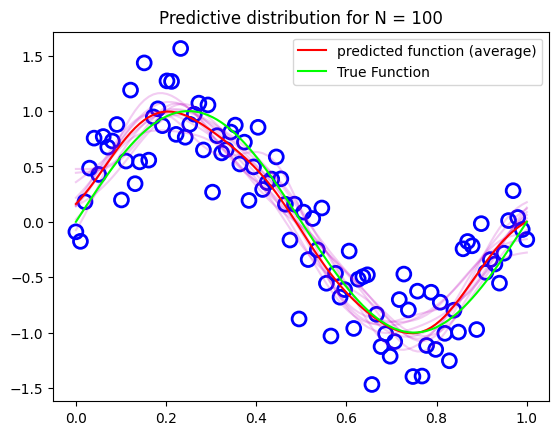

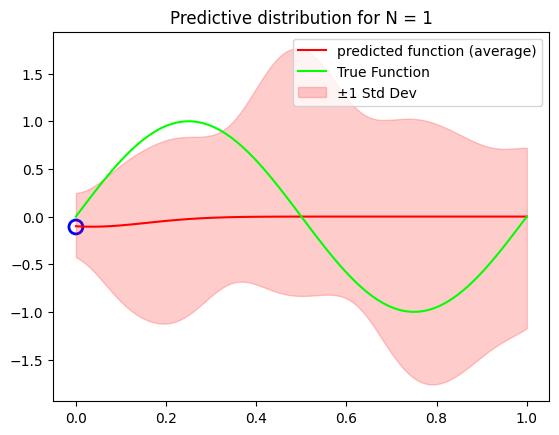

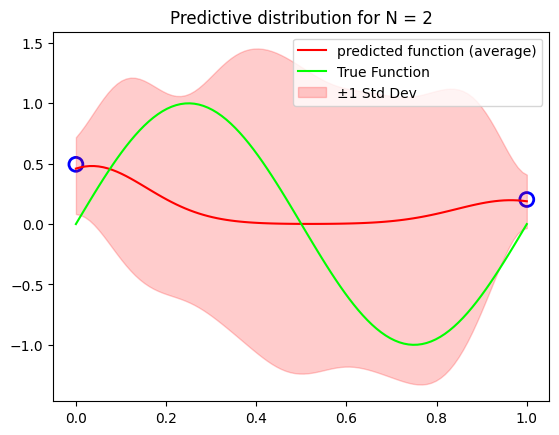

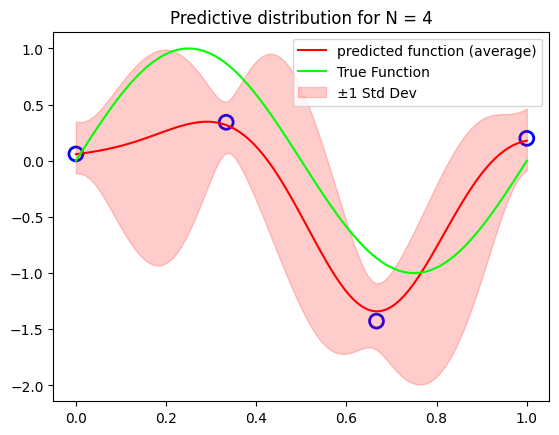

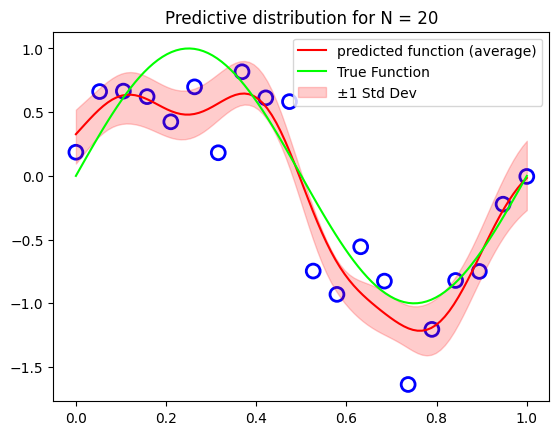

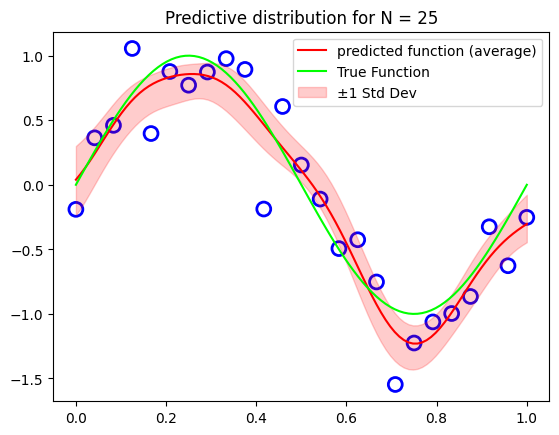

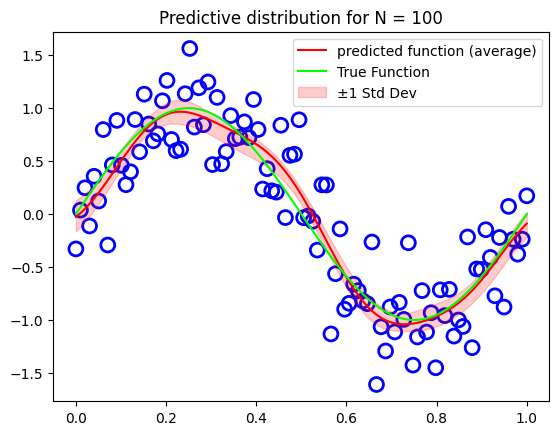

In [22]:
#Understanding MAP estimate
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
from scipy.stats import multivariate_normal

def create_data(size):
    e = rng.standard_normal(size) * (0.1**0.5)
    xs = np.linspace(0, 1, size)
    ts = np.sin(2*np.pi*xs) + e
    return xs, ts

def gaussian_featurize(x_scalar, M):
    means = np.linspace(0, 1, M)
    s = 0.1
    x_vector = np.array([np.exp(-0.5 * ((x_scalar - mean) / s) ** 2) for mean in means])
    return x_vector

def GaussianPred(w_est, X_train, M):
    x_train = np.array([gaussian_featurize(X_train[i], M) for i in range(X_train.shape[0])])
    TrainPred = x_train @ w_est
    return TrainPred

def GaussianFit(X_train, Y_train, M, lamda, n):
    phi = np.zeros((n, M))
    for i in range(n):
        phi[i] = gaussian_featurize(X_train[i], M)
    identity = np.identity(phi.shape[1])
    Y_train = Y_train.reshape(-1, 1)
    w_opt = np.linalg.inv(phi.T @ phi + lamda * identity) @ (phi.T @ Y_train)
    return w_opt

def sorted_data(x, pred):    
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    pred_sorted =  pred[sorted_indices]
    return x_sorted, pred_sorted




xs, ts = create_data(100)
w = GaussianFit(xs, ts, 20,0, 100)
pred = GaussianPred(w, xs, 20)
# all_preds.append(pred)
x_sorted, pred_sorted = sorted_data(xs, pred)
# plt.plot(x_sorted, pred_sorted, c='r')
# plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'g-', label='True Function')

########################################
#Update the statistics of posterior density
########################################
#Initialie the parameters for standard normal prior
mean = np.zeros(20)
alpha = np.identity(20)
w = multivariate_normal(mean, np.linalg.inv(alpha))
beta = 10
#Iterate through the data points and update the stats of posterior density

for x,y in zip(xs, ts):
    # x = datapoint[0]
    # y = datapoint[1]
    phi = gaussian_featurize(x, 20)
    alpha_old = alpha
    mean_old = mean
    alpha = alpha_old + beta * np.outer(phi, phi)
    mean = np.linalg.inv(alpha) @ (alpha_old@ mean_old + beta * (phi)* y)

w_posterior = multivariate_normal(mean, np.linalg.inv(alpha))



w_samples =  w_posterior.rvs(size=100)
all_preds = []
for w_sample in w_samples: 
    pred = GaussianPred(w_sample, xs, 20)
    all_preds.append(pred)
    x_sorted, pred_sorted = sorted_data(xs, pred)
    plt.plot(xs, pred, c='m', alpha=0.2)

mean_pred = np.mean(all_preds, axis=0)
x_sorted, mean_pred_sorted = sorted_data(xs, mean_pred)
plt.plot(xs, mean_pred, c='navy', label='Mean of Estimated Curves')
plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'g-', label='True Function')
plt.legend()
plt.title("Mean of the curves vs true function")
plt.show()


dataset_sizes = [1, 2, 4, 20, 25, 100]
M = 10
X= np.linspace(0, 1, 100)
T = np.sin(X)
for size in dataset_sizes:
    xs, ts = create_data(size)
    mean = np.zeros(M)
    alpha = np.identity(M)
    w = multivariate_normal(mean, np.linalg.inv(alpha))
    beta = 10
    #Iterate through the data points and update the stats of posterior density

    for x,y in zip(xs, ts):
        # x = datapoint[0]
        # y = datapoint[1]
        phi = gaussian_featurize(x, M)
        alpha_old = alpha
        mean_old = mean
        alpha = alpha_old + beta * np.outer(phi, phi)
        mean = np.linalg.inv(alpha) @ (alpha_old@ mean_old + beta * (phi)* y)


    w_posterior = multivariate_normal(mean, np.linalg.inv(alpha))
    w = w_posterior.mean # choose the mean to be m_N (i.e, the mean of the posterior distribution)

    w_samples =  w_posterior.rvs(size=M)
    all_preds = []
    for w_sample in w_samples: 
        pred = GaussianPred(w_sample, X, M)
        all_preds.append(pred)
        x_sorted, pred_sorted = sorted_data(xs, pred)
        plt.plot(X, pred, c='m', alpha=0.2)

    pred = GaussianPred(w, X, M)
    x_sorted, pred_sorted = sorted_data(X, pred)
    plt.scatter(xs, ts, s=100, edgecolors='blue', facecolors='none', linewidths=2)
    plt.plot(X, pred, c='r', label="predicted function (average)")
    plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'lime', label='True Function')
    plt.title(f'Predictive distribution for N = {size}')
    plt.legend()
    plt.show()


for size in dataset_sizes:
    xs, ts = create_data(size)
    mean = np.zeros(M)
    alpha = np.identity(M)
    w = multivariate_normal(mean, np.linalg.inv(alpha))
    beta = 10
    #Iterate through the data points and update the stats of posterior density

    for x,y in zip(xs, ts):
        # x = datapoint[0]
        # y = datapoint[1]
        phi = gaussian_featurize(x, M)
        alpha_old = alpha
        mean_old = mean
        alpha = alpha_old + beta * np.outer(phi, phi)
        mean = np.linalg.inv(alpha) @ (alpha_old@ mean_old + beta * (phi)* y)


    w_posterior = multivariate_normal(mean, np.linalg.inv(alpha))
    w = w_posterior.mean # choose the mean to be m_N (i.e, the mean of the posterior distribution)
    sampled_curves = []
    for _ in range(25):
        w_sample = w_posterior.rvs(size=1)
        y_pred = GaussianPred(w_sample, X, M)
        sampled_curves.append(y_pred)
    
    sampled_curves = np.array(sampled_curves)
    y_mean = np.mean(sampled_curves, axis=0)
    y_std = np.std(sampled_curves, axis=0)
    pred = GaussianPred(w, X, M)
    x_sorted, pred_sorted = sorted_data(X, pred)
    plt.scatter(xs, ts, s=100, edgecolors='blue', facecolors='none', linewidths=2)
    plt.plot(X, pred, c='r', label="predicted function (average)")
    plt.plot(np.linspace(0, 1, 100), np.sin(2*np.pi*np.linspace(0, 1, 100)), 'lime', label='True Function')
    plt.fill_between(X, y_mean - y_std, y_mean + y_std, color='red', alpha=0.2, label='±1 Std Dev')
    plt.title(f'Predictive distribution for N = {size}')
    plt.legend()
    plt.show()



########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################





########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves





#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class






Observation 1: The MAP estimate provides a way to incorporate prior knowledge into the parameter estimation process, leading to more robust estimates, especially with limited data.

Observation 2: As the number of training data points increases, the posterior distribution of the parameters becomes more concentrated around the true values, indicating improved estimation accuracy.

Observation 3: The predictive distribution becomes more accurate and confident (narrower) as more data points are used for training, reflecting the reduction in uncertainty. Also we can clearly see that the uncertainity is lesser in the neighbourhood of the datapoints (observe the predictive distribution plot for N=4)